In [1]:
#pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225) 
  
# data (as pandas dataframes) 
X = ilpd_indian_liver_patient_dataset.data.features 
y = ilpd_indian_liver_patient_dataset.data.targets 
  
# metadata 
print(ilpd_indian_liver_patient_dataset.metadata) 
  
# variable information 
print(ilpd_indian_liver_patient_dataset.variables) 


{'uci_id': 225, 'name': 'ILPD (Indian Liver Patient Dataset)', 'repository_url': 'https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/225/data.csv', 'abstract': 'Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. \nThe dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India.\nThe prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.\n', 'area': 'He

In [3]:
# Package for data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [5]:
# Data encoding for target variable: 1 for liver disease patient and 0 for patient without liver disease.
y = y.replace({2:0})
y.value_counts()

Selector
1           416
0           167
Name: count, dtype: int64

In [6]:
# Data encoding for gender: 1 for male and 0 for female.
X['Gender'] = X['Gender'].map({'Male':1, 'Female':0})
X['Gender'].value_counts()

C:\Users\roxyl\AppData\Local\Temp\ipykernel_38320\3170249218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male':1, 'Female':0})


Gender
1    441
0    142
Name: count, dtype: int64

In [7]:
# description statistics of this dataset
X.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [9]:
# Data imputation
X.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
dtype: int64

In [10]:
y.isnull().sum()

Selector    0
dtype: int64

In [11]:
# See data where the null values in the column A/G Ratio
X[X['A/G Ratio'].isnull()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN


In [12]:
# Fill the null values using multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=11)
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    float64
 1   Gender     583 non-null    float64
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    float64
 5   Sgpt       583 non-null    float64
 6   Sgot       583 non-null    float64
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
dtypes: float64(10)
memory usage: 45.7 KB


In [13]:
X_imputed.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.948453
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319347
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [14]:
# dscription statistics of the imputed data according to the target variable
# merge x and y
merged = pd.concat([X_imputed, y], axis=1)
sum_by_target = merged.groupby('Selector').describe()
pd.set_option('display.max_columns', None)
print(sum_by_target)

            Age                                                    Gender  \
          count       mean        std  min   25%   50%   75%   max  count   
Selector                                                                    
0         167.0  41.239521  16.999366  4.0  28.0  40.0  55.0  85.0  167.0   
1         416.0  46.153846  15.654412  7.0  34.0  46.0  58.0  90.0  416.0   

                                                          TB            \
              mean       std  min  25%  50%  75%  max  count      mean   
Selector                                                                 
0         0.700599  0.459373  0.0  0.0  1.0  1.0  1.0  167.0  1.142515   
1         0.778846  0.415524  0.0  1.0  1.0  1.0  1.0  416.0  4.164423   

                                                   DB                      \
               std  min  25%  50%    75%   max  count      mean       std   
Selector                                                                    
0         1.

In [15]:
merged.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [16]:
print(merged[merged.Selector == 1].value_counts('Gender',normalize=True))
print(merged[merged.Selector == 1].value_counts('Gender'))
print(merged[merged.Selector == 0].value_counts('Gender',normalize=True))
print(merged[merged.Selector == 0].value_counts('Gender'))

Gender
1.0    0.778846
0.0    0.221154
Name: proportion, dtype: float64
Gender
1.0    324
0.0     92
Name: count, dtype: int64
Gender
1.0    0.700599
0.0    0.299401
Name: proportion, dtype: float64
Gender
1.0    117
0.0     50
Name: count, dtype: int64


In [17]:
health_data = merged[merged.Selector == 0]
health_data = health_data.drop(['Gender','Selector'],axis=1)
ld_data = merged[merged.Selector == 1]
ld_data = ld_data.drop(['Gender','Selector'],axis=1)

In [18]:
health_data.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,41.239521,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.031468
std,16.999366,1.004472,0.519255,140.986262,25.060392,36.411620,1.063042,0.783690,0.286797
min,4.000000,0.500000,0.100000,90.000000,10.000000,10.000000,3.700000,1.400000,0.370000
25%,28.000000,0.700000,0.200000,161.500000,20.000000,21.000000,5.900000,2.900000,0.900000
50%,40.000000,0.800000,0.200000,186.000000,27.000000,29.000000,6.600000,3.400000,1.000000
75%,55.000000,1.100000,0.350000,213.000000,37.500000,43.500000,7.300000,4.000000,1.200000
max,85.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,9.200000,5.000000,1.900000


In [19]:
ld_data.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,46.153846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.915127
std,15.654412,7.144831,3.206901,268.307911,212.768472,337.389980,1.094659,0.786595,0.325935
min,7.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000
25%,34.000000,0.800000,0.200000,186.000000,25.000000,29.750000,5.700000,2.500000,0.700000
50%,46.000000,1.400000,0.500000,229.000000,41.000000,52.500000,6.550000,3.000000,0.900000
75%,58.000000,3.625000,1.800000,315.250000,76.500000,108.750000,7.200000,3.625000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


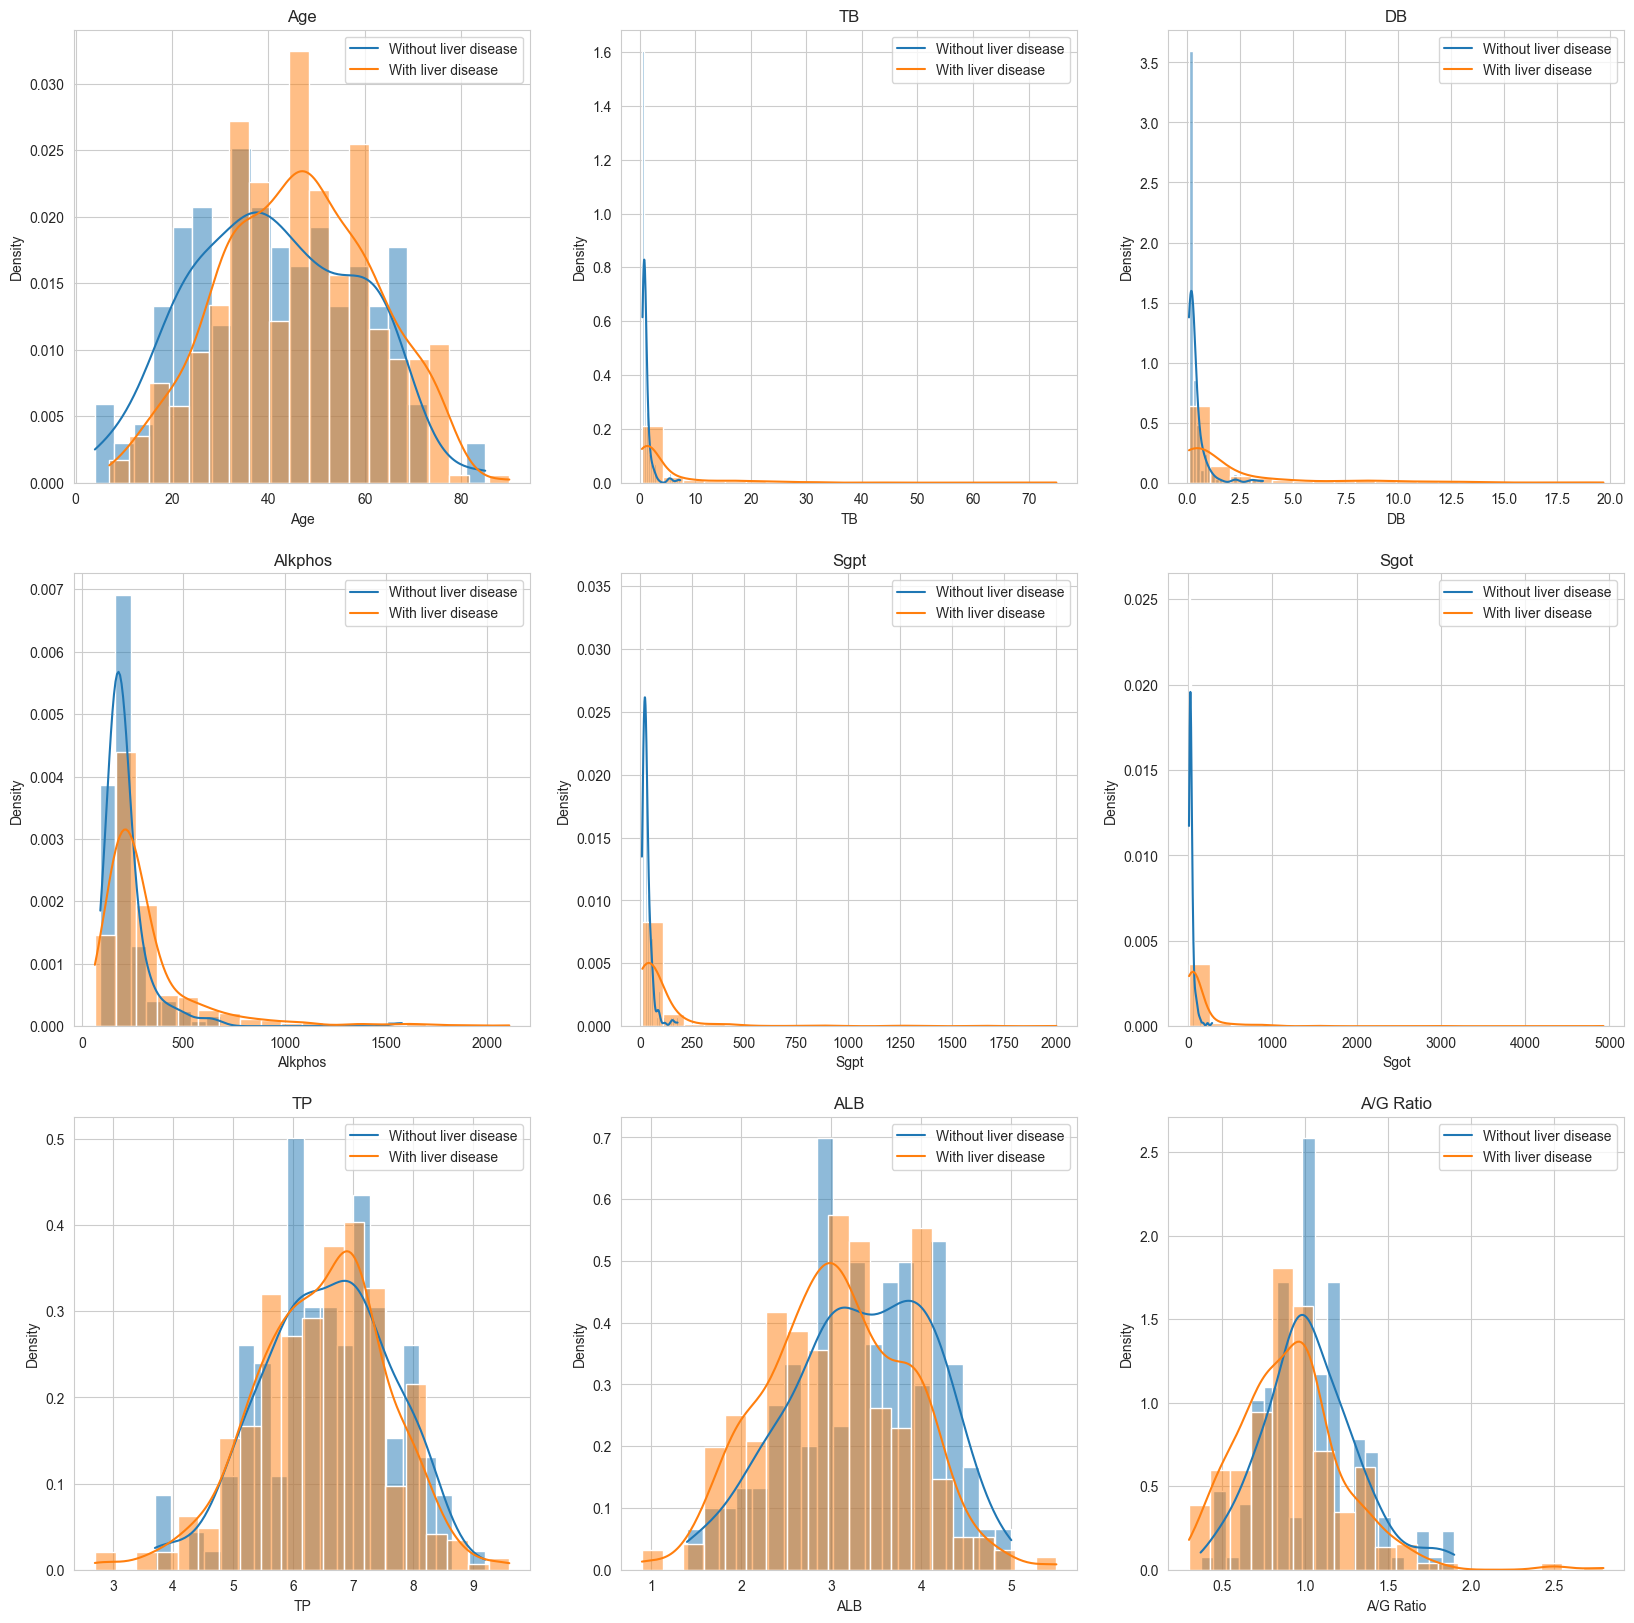

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
for i in range(len(health_data.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(health_data.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(health_data.columns[i])
    plt.legend(['Without liver disease','With liver disease'],loc = 'upper right')

for i in range(len(ld_data.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(ld_data.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(ld_data.columns[i])
    plt.legend(['Without liver disease','With liver disease'],loc = 'upper right')

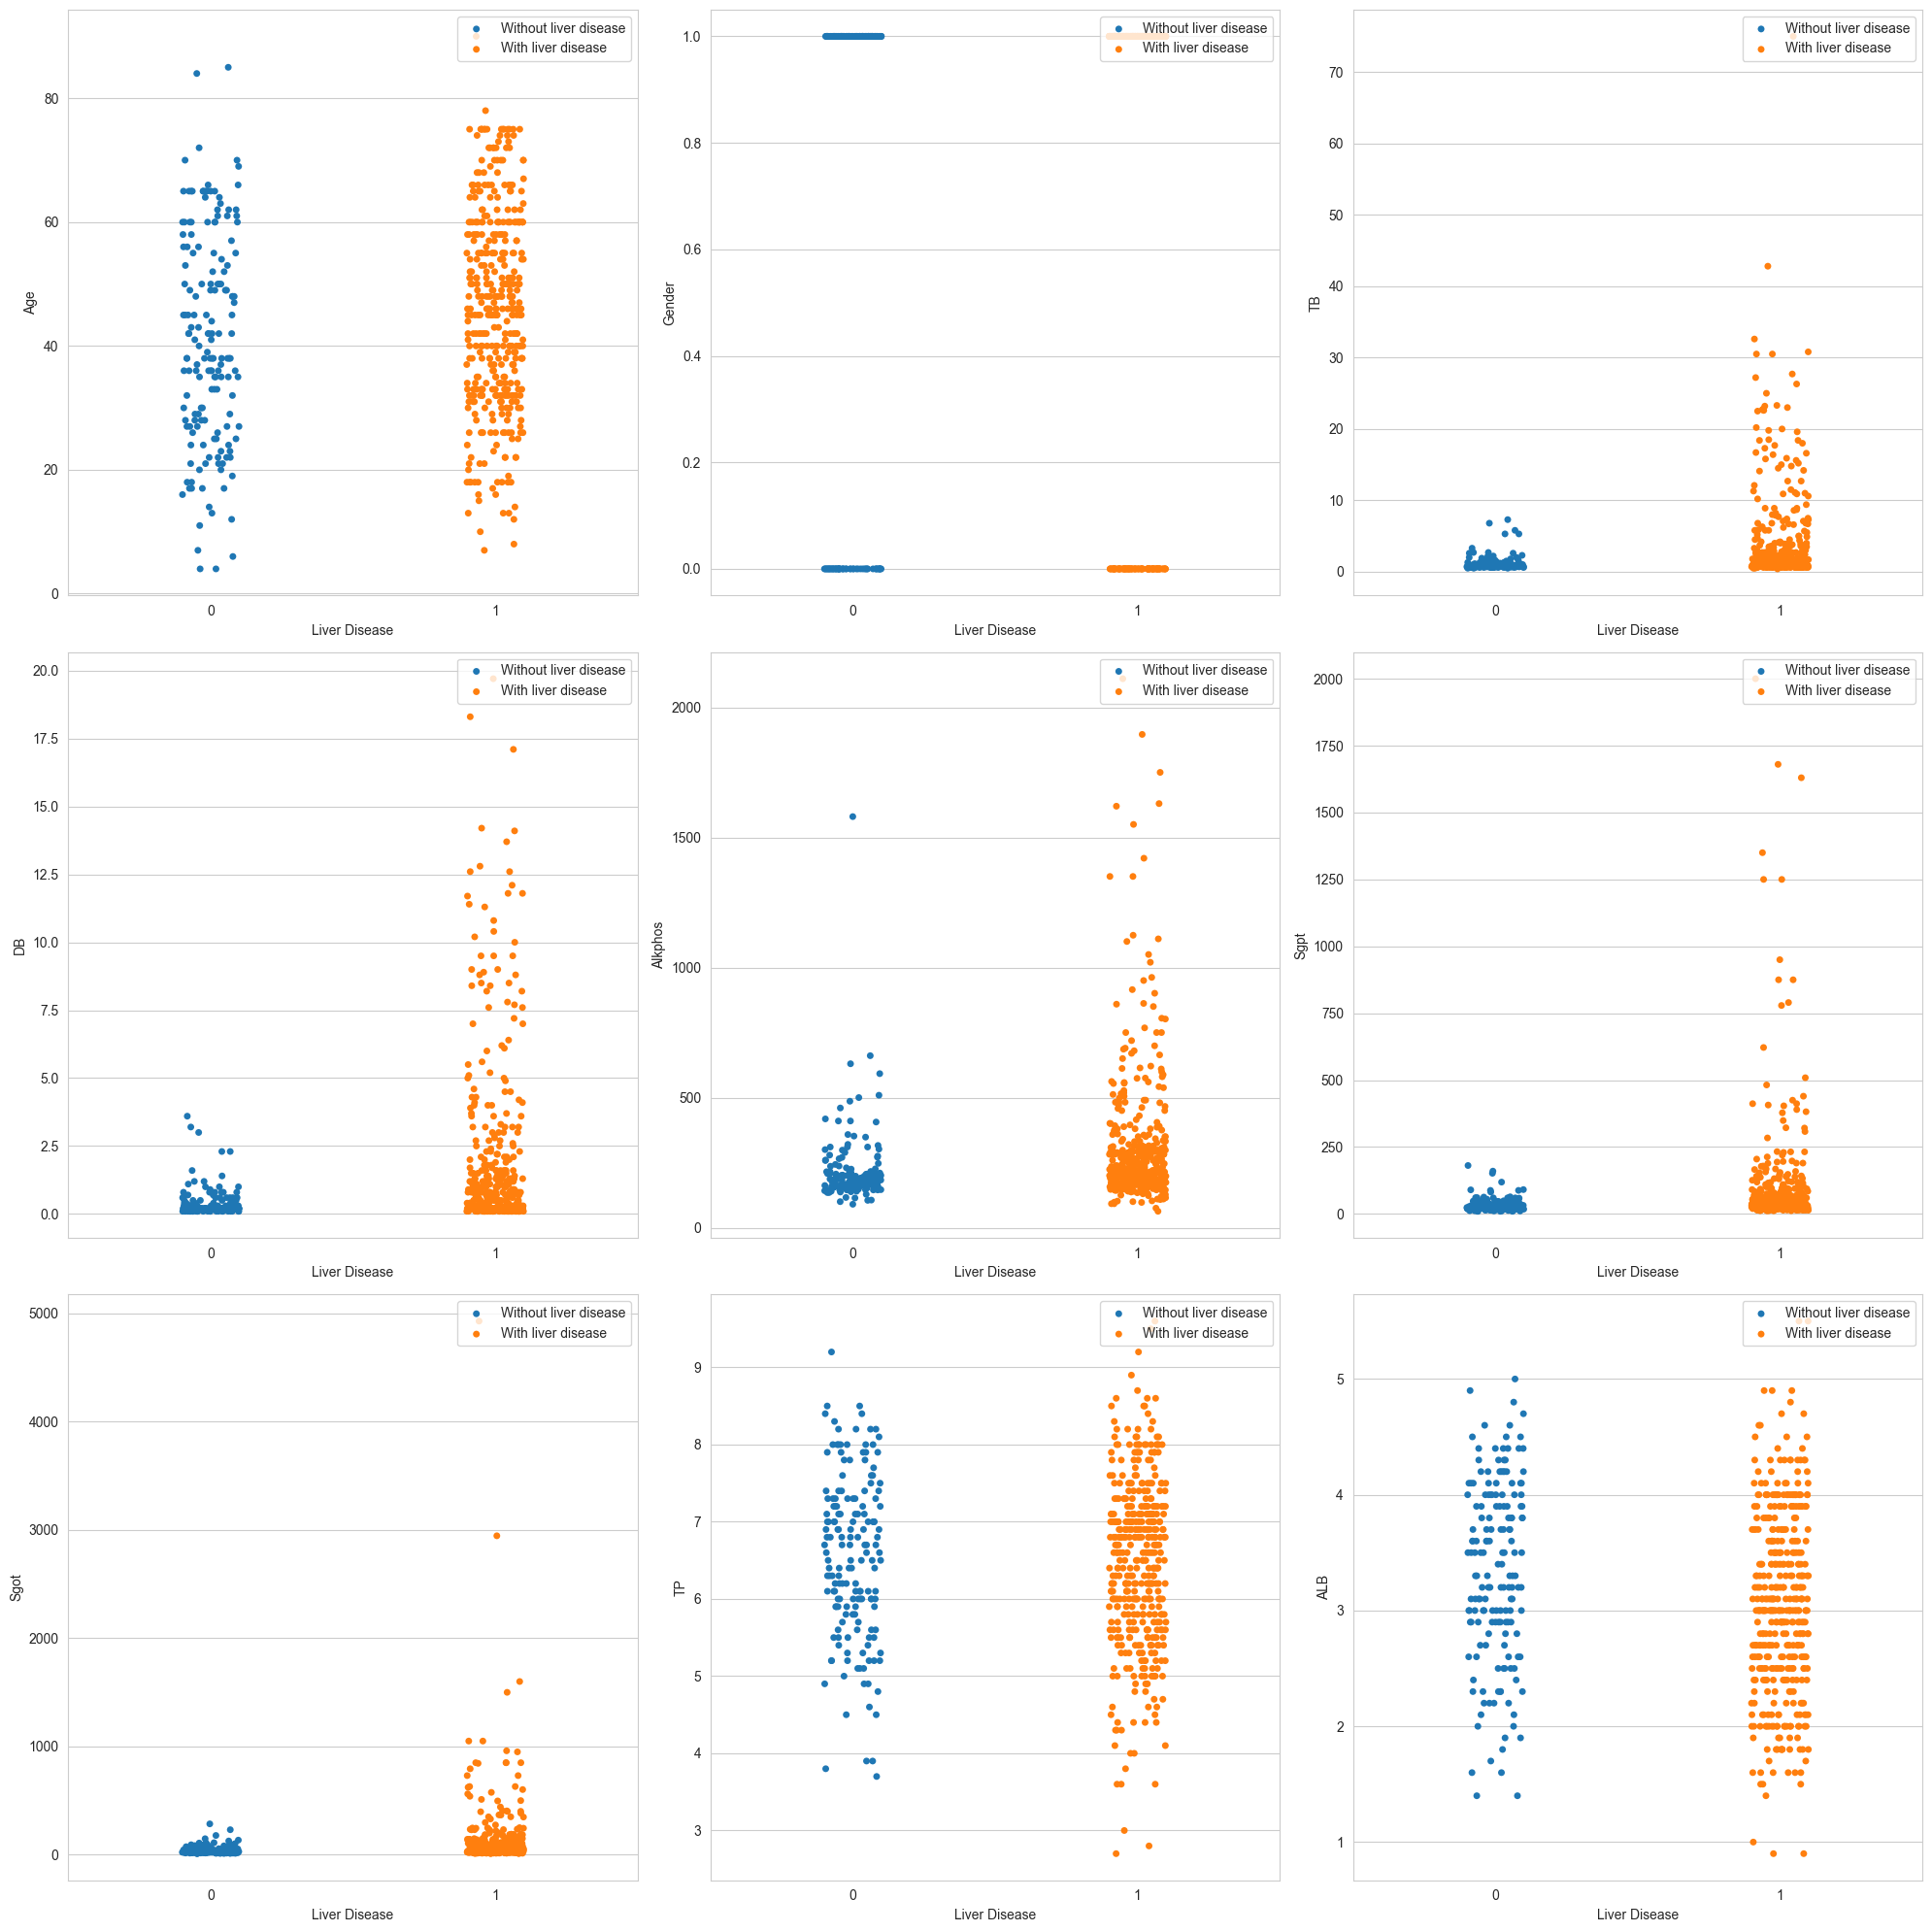

In [21]:
# check the outliers

plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
#transfer y to 1 dimension
y1 = y.values.ravel()

for column in X_imputed.columns:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        data = X_imputed[column]
        sns.stripplot(x=y1, y=data, hue=y1, ax=ax)
        #legend:0 for without liver disease, 1 for with liver disease
        plt.legend(['Without liver disease','With liver disease'],loc = 'upper right')
        plt.xlabel('Liver Disease')
        plt.ylabel(column)
        plotnumber+=1

plt.tight_layout()

In [22]:
# Devide the data into three groups: <30, 30-60, >60 acording to the Age column
merged['Age_group'] = pd.cut(merged['Age'], bins=[0,29,60,90], labels=['<30','30-60','>60'])
merged['Age_group'].value_counts()

Age_group
30-60    379
<30      105
>60       99
Name: count, dtype: int64

In [23]:
sum_by_age = merged.groupby('Age_group').describe()
pd.set_option('display.max_columns', None)
print(sum_by_age)

             Age                                                    Gender  \
           count       mean       std   min   25%   50%   75%   max  count   
Age_group                                                                    
<30        105.0  21.114286  6.164904   4.0  18.0  22.0  26.0  29.0  105.0   
30-60      379.0  45.087071  9.050436  30.0  38.0  45.0  52.0  60.0  379.0   
>60         99.0  68.505051  5.594045  61.0  65.0  66.0  72.0  90.0   99.0   

                                                           TB            \
               mean       std  min  25%  50%  75%  max  count      mean   
Age_group                                                                 
<30        0.714286  0.453921  0.0  0.0  1.0  1.0  1.0  105.0  2.227619   
30-60      0.754617  0.430883  0.0  1.0  1.0  1.0  1.0  379.0  3.801319   
>60        0.808081  0.395814  0.0  1.0  1.0  1.0  1.0   99.0  2.511111   

                                                    DB                      \
  

C:\Users\roxyl\AppData\Local\Temp\ipykernel_38320\966189442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_by_age = merged.groupby('Age_group').describe()


In [24]:
print(merged[merged.Age_group == '<30'].value_counts('Gender',normalize=True))
print(merged[merged.Age_group == '<30'].value_counts('Gender'))
print(merged[merged.Age_group == '30-60'].value_counts('Gender',normalize=True))
print(merged[merged.Age_group == '30-60'].value_counts('Gender'))
print(merged[merged.Age_group == '>60'].value_counts('Gender',normalize=True))
print(merged[merged.Age_group == '>60'].value_counts('Gender'))

Gender
1.0    0.714286
0.0    0.285714
Name: proportion, dtype: float64
Gender
1.0    75
0.0    30
Name: count, dtype: int64
Gender
1.0    0.754617
0.0    0.245383
Name: proportion, dtype: float64
Gender
1.0    286
0.0     93
Name: count, dtype: int64
Gender
1.0    0.808081
0.0    0.191919
Name: proportion, dtype: float64
Gender
1.0    80
0.0    19
Name: count, dtype: int64


In [25]:
# dscription statistics of the imputed data according to the gender
sum_by_gender = X_imputed.groupby('Gender').describe()
pd.set_option('display.max_columns', None)
print(sum_by_gender)

          Age                                                        TB  \
        count       mean        std  min   25%   50%   75%   max  count   
Gender                                                                    
0.0     142.0  43.133803  15.899163  7.0  31.0  45.0  53.0  85.0  142.0   
1.0     441.0  45.265306  16.266108  4.0  33.0  45.0  60.0  90.0  441.0   

                                                         DB            \
            mean       std  min  25%  50%  75%   max  count      mean   
Gender                                                                  
0.0     2.322535  4.863417  0.5  0.7  0.8  1.1  27.7  142.0  0.989437   
1.0     3.613152  6.558631  0.4  0.8  1.2  2.9  75.0  441.0  1.646032   

                                           Alkphos                          \
             std  min  25%  50%  75%   max   count        mean         std   
Gender                                                                       
0.0     2.398513  0.1  0

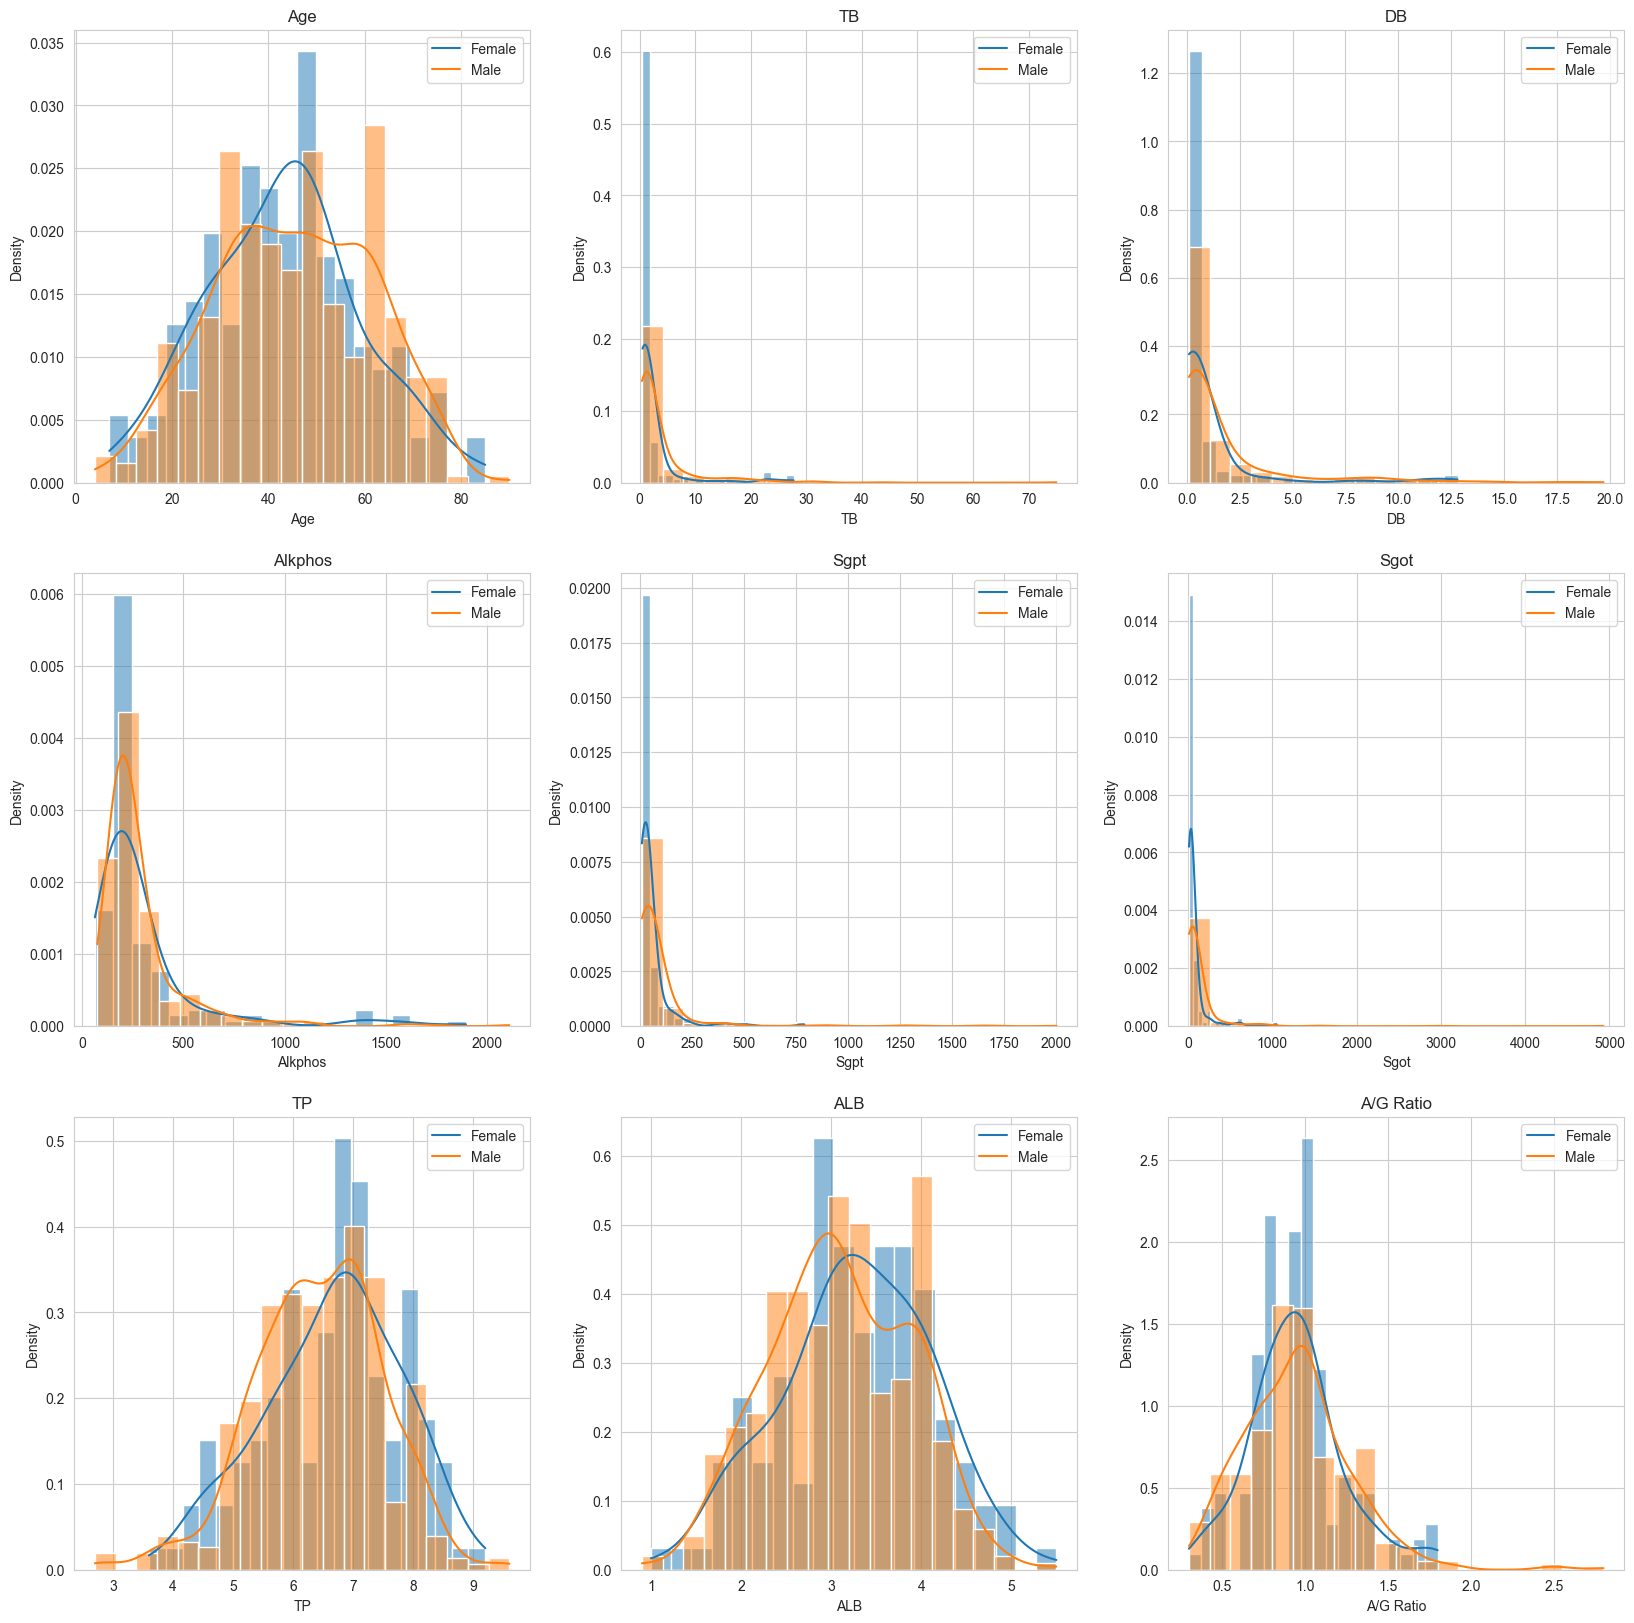

In [26]:
# check difference of the distribution of the imputed data between male and female
f_data = X_imputed[X_imputed.Gender == 0]
f_data = f_data.drop('Gender', axis = 1)
m_data = X_imputed[X_imputed.Gender == 1]
m_data = m_data.drop('Gender', axis = 1)

sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
for i in range(len(f_data.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(f_data.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(f_data.columns[i])
    plt.legend(['Female','Male'],loc = 'upper right')

for i in range(len(m_data.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(m_data.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(m_data.columns[i])
    plt.legend(['Female','Male'],loc = 'upper right')

plt.show()

Hence, apart from the difference in the amount of records, there is no need to analysis by gender.

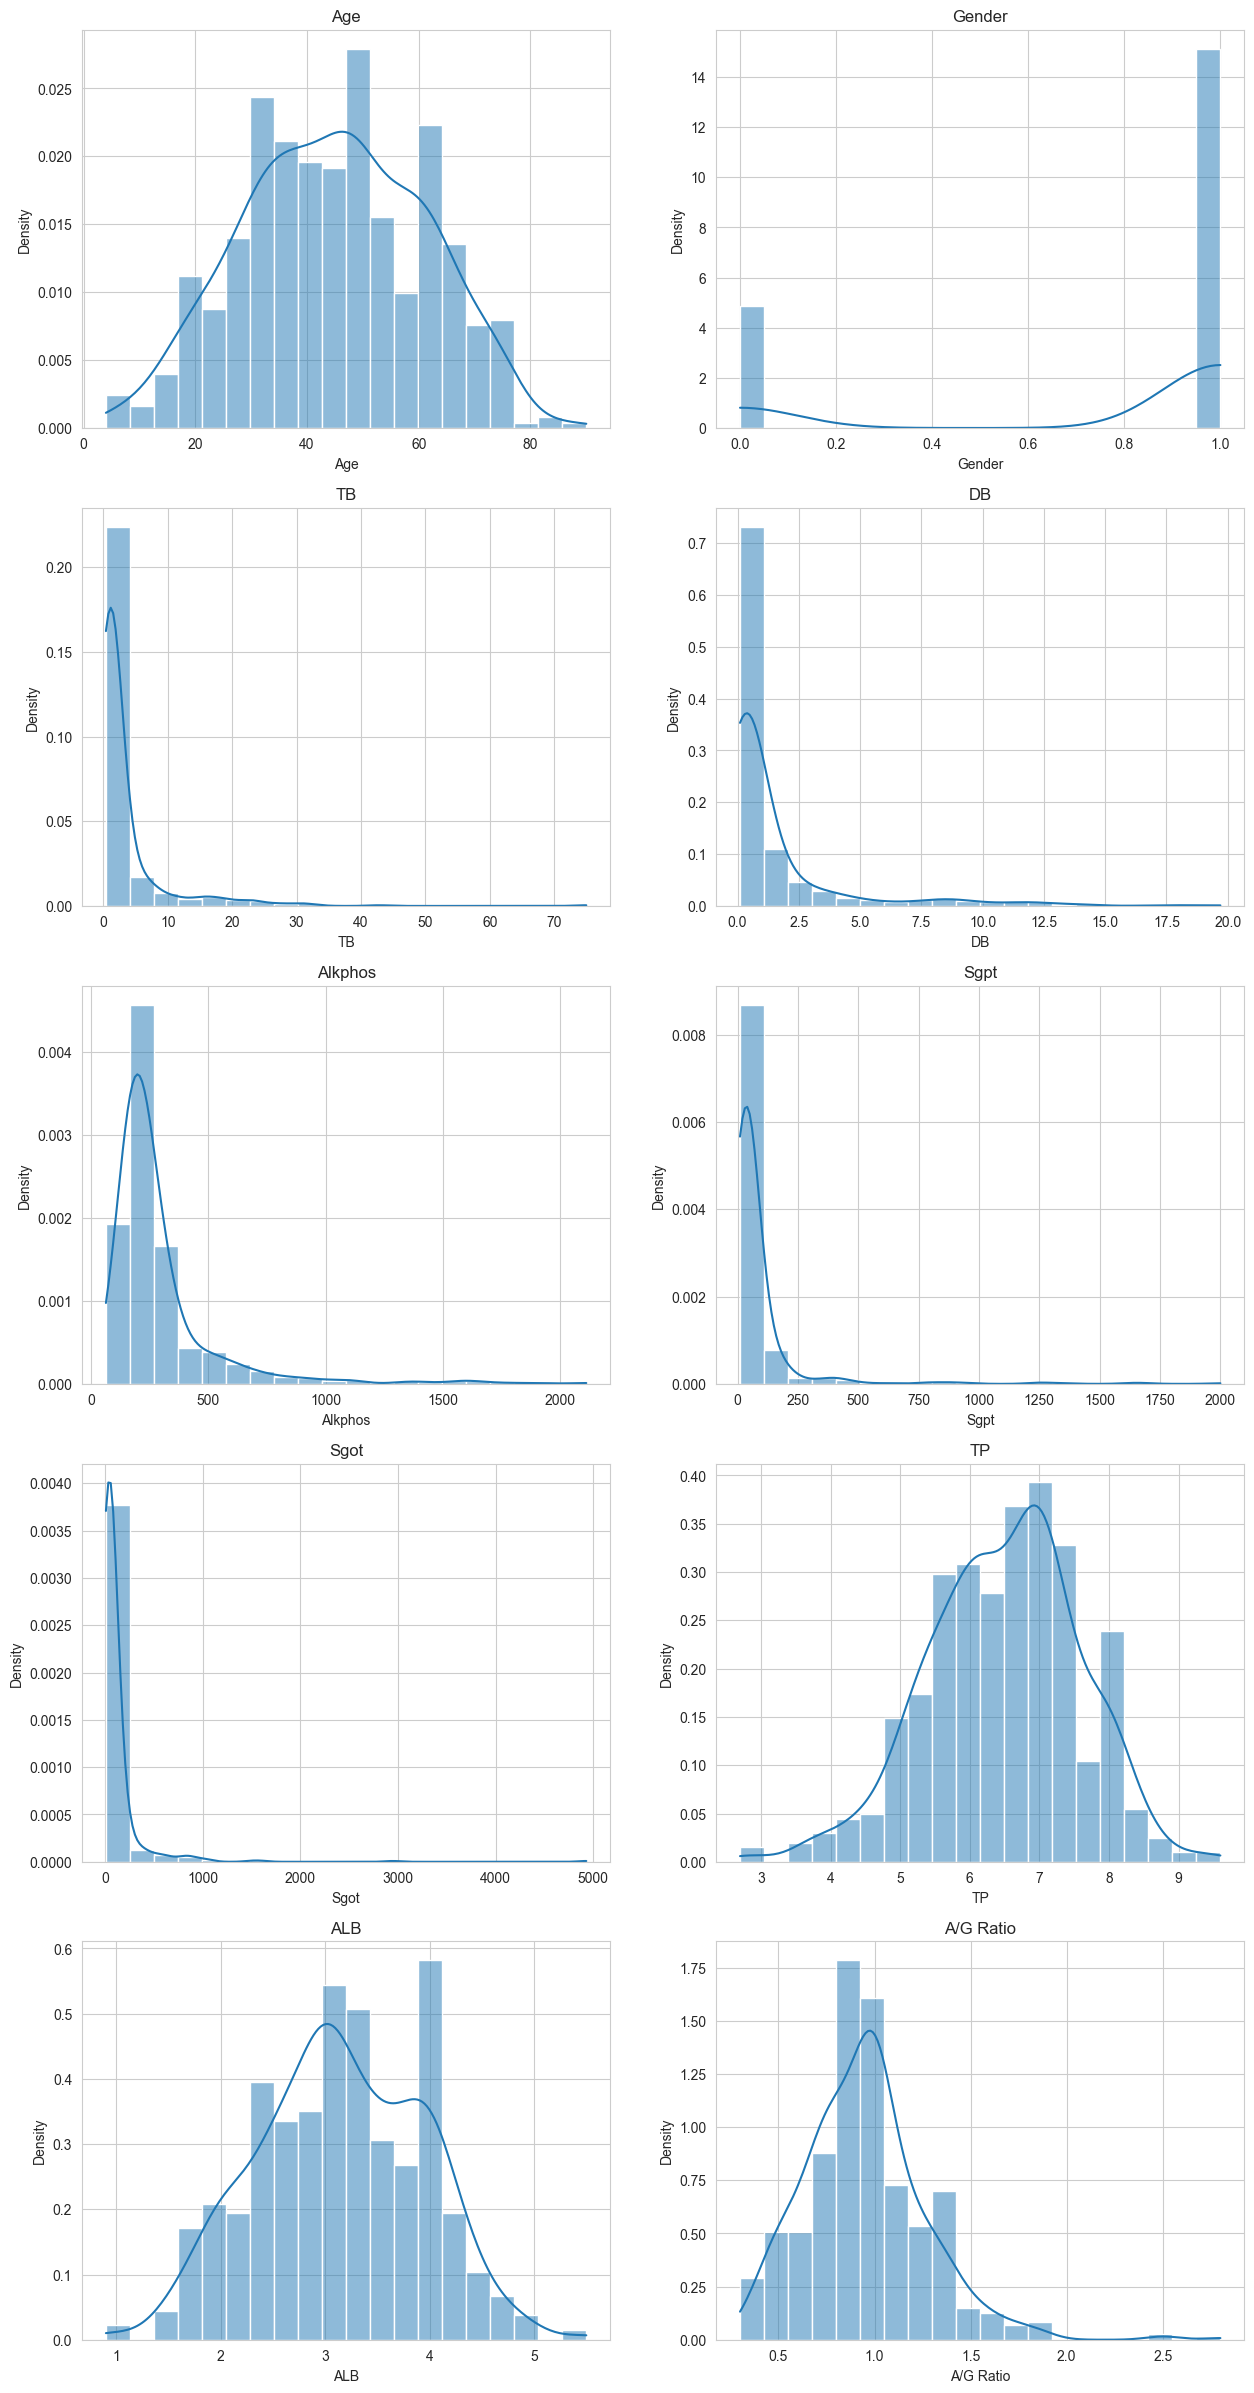

In [27]:
# Let's see the overall distribution of those features without any stratification in the dataset with normal distribution curve
sns.set_style("whitegrid")
plt.figure(figsize=(15,30))
for i in range(len(X_imputed.columns)):
    plt.subplot(5, 2, i+1)
    sns.histplot(X_imputed.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(X_imputed.columns[i])
plt.show()

Distribution curves can be plotted to check whether the data is skewed or not. When the distribution curve of the data is distorted towards either the left or right side, then it is said to be skewed. Skewed data can affect performance by violating model assumptions or by affecting the interpretation of feature importances. In the ILPD dataset, the features that are skewed are: 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT', and 'A/G Ratio'. There are various transformations available for handling the skewed data, but here, after tring 'exponential', 'boxcox', 'square root', the ‘log1p’ transformation is used. It effectively helps to balance the distribution of the curve. The formula used for the ‘log1p’ transformation is given by equation $X_{new} = log(1 + X_{old})$.

In [28]:
# Transform the skewed features by taking the log1p of them
skew = X_imputed[['TB','DB','Alkphos','Sgpt','Sgot','A/G Ratio']]
skew.head()

,TB,DB,Alkphos,Sgpt,Sgot,A/G Ratio
0,0.7,0.1,187.0,16.0,18.0,0.90
1,10.9,5.5,699.0,64.0,100.0,0.74
2,7.3,4.1,490.0,60.0,68.0,0.89
3,1.0,0.4,182.0,14.0,20.0,1.00
4,3.9,2.0,195.0,27.0,59.0,0.40


In [29]:
# use log1p to transform the skewed features
skew = np.log1p(skew)
skew.head()

,TB,DB,Alkphos,Sgpt,Sgot,A/G Ratio
0,0.530628,0.095310,5.236442,2.833213,2.944439,0.641854
1,2.476538,1.871802,6.551080,4.174387,4.615121,0.553885
2,2.116256,1.629241,6.196444,4.110874,4.234107,0.636577
3,0.693147,0.336472,5.209486,2.708050,3.044522,0.693147
4,1.589235,1.098612,5.278115,3.332205,4.094345,0.336472


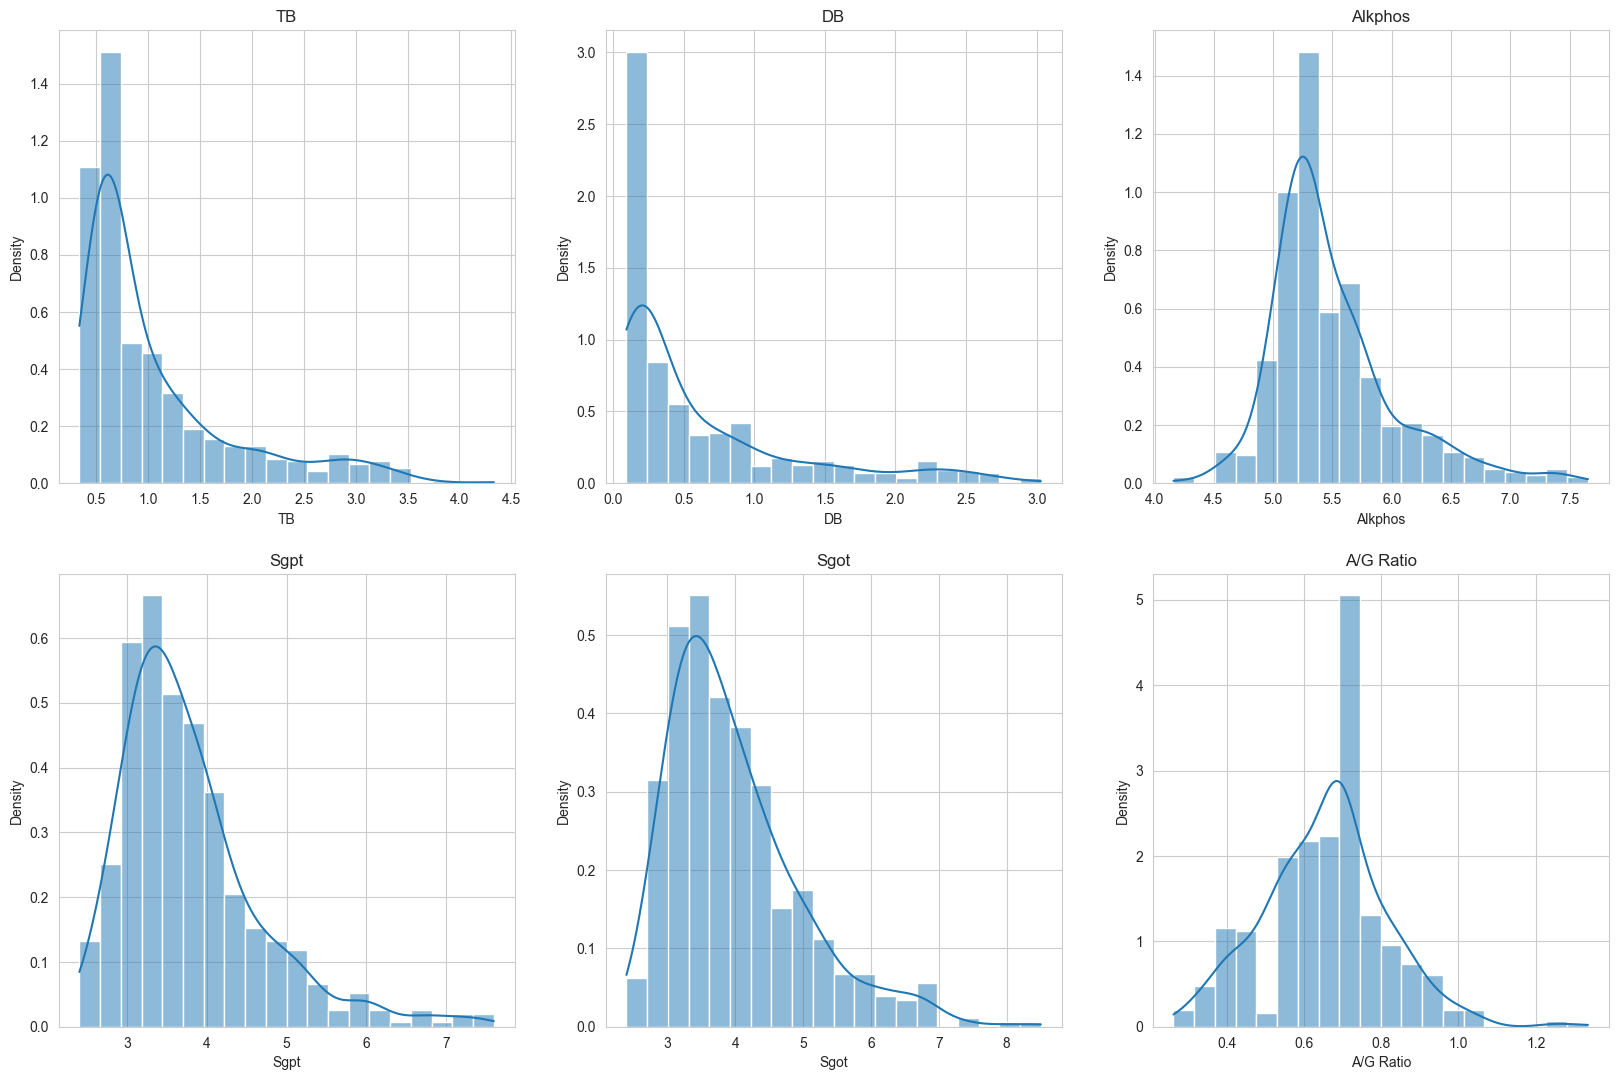

In [30]:
plt.figure(figsize=(20,20))
for i in range(len(skew.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(skew.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(skew.columns[i])
plt.show()

In [31]:
# replace the original features with the transformed features(skew)
X_imputed[['TB','DB','Alkphos','Sgpt','Sgot','A/G Ratio']] = skew
X_imputed.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65.0,0.0,0.530628,0.095310,5.236442,2.833213,2.944439,6.8,3.3,0.641854
1,62.0,1.0,2.476538,1.871802,6.551080,4.174387,4.615121,7.5,3.2,0.553885
2,62.0,1.0,2.116256,1.629241,6.196444,4.110874,4.234107,7.0,3.3,0.636577
3,58.0,1.0,0.693147,0.336472,5.209486,2.708050,3.044522,6.8,3.4,0.693147
4,72.0,1.0,1.589235,1.098612,5.278115,3.332205,4.094345,7.3,2.4,0.336472


In [32]:
# Data Balancing
print(y.value_counts())
y.value_counts(normalize=True)

Selector
1           416
0           167
Name: count, dtype: int64


Selector
1           0.713551
0           0.286449
Name: proportion, dtype: float64

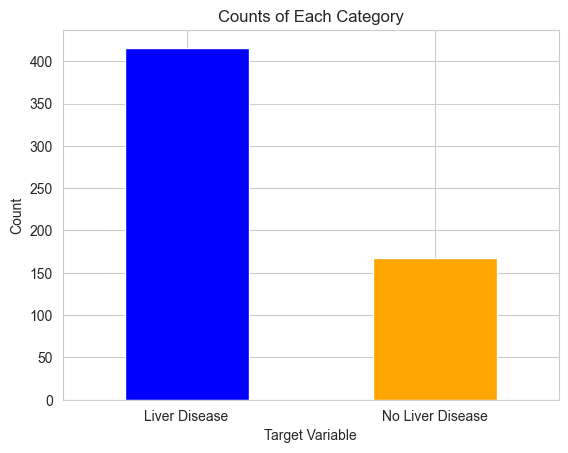

In [33]:
# Barplot of the target variable    

counts = y.value_counts()
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Counts of Each Category')
plt.xticks([1, 0], ['No Liver Disease', 'Liver Disease'], rotation = 0)
plt.show()


In [34]:
# Use oversampling to balance the dataset
from imblearn.over_sampling import RandomOverSampler

OS = RandomOverSampler(random_state=11)
osx, osy = OS.fit_resample(X_imputed, y)
osx.shape


(832, 10)

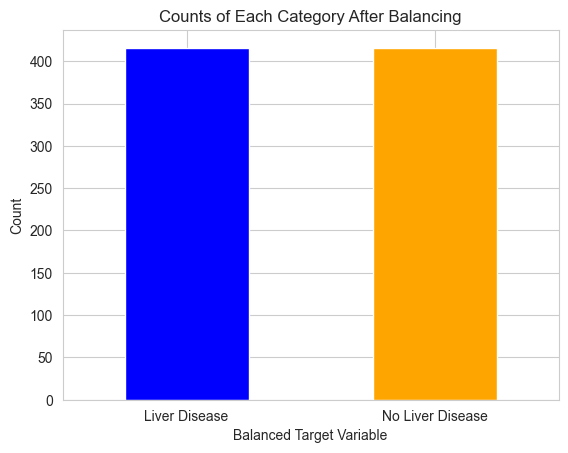

In [35]:
counts = osy.value_counts()
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Balanced Target Variable')
plt.ylabel('Count')
plt.title('Counts of Each Category After Balancing')
plt.xticks([1, 0], ['No Liver Disease', 'Liver Disease'], rotation = 0)
plt.show()

In [36]:
osx.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65.0,0.0,0.530628,0.095310,5.236442,2.833213,2.944439,6.8,3.3,0.641854
1,62.0,1.0,2.476538,1.871802,6.551080,4.174387,4.615121,7.5,3.2,0.553885
2,62.0,1.0,2.116256,1.629241,6.196444,4.110874,4.234107,7.0,3.3,0.636577
3,58.0,1.0,0.693147,0.336472,5.209486,2.708050,3.044522,6.8,3.4,0.693147
4,72.0,1.0,1.589235,1.098612,5.278115,3.332205,4.094345,7.3,2.4,0.336472


In [37]:
# Min–max normalization Data Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

osx_scaled = scaler.fit_transform(osx)
osx_scaled = pd.DataFrame(osx_scaled, columns=osx.columns)
print(osx_scaled.shape)
osx_scaled.head()

(832, 10)


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,0.709302,0.0,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.353791
1,0.674419,1.0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.271780
2,0.674419,1.0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.348872
3,0.627907,1.0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.401611
4,0.790698,1.0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.069090


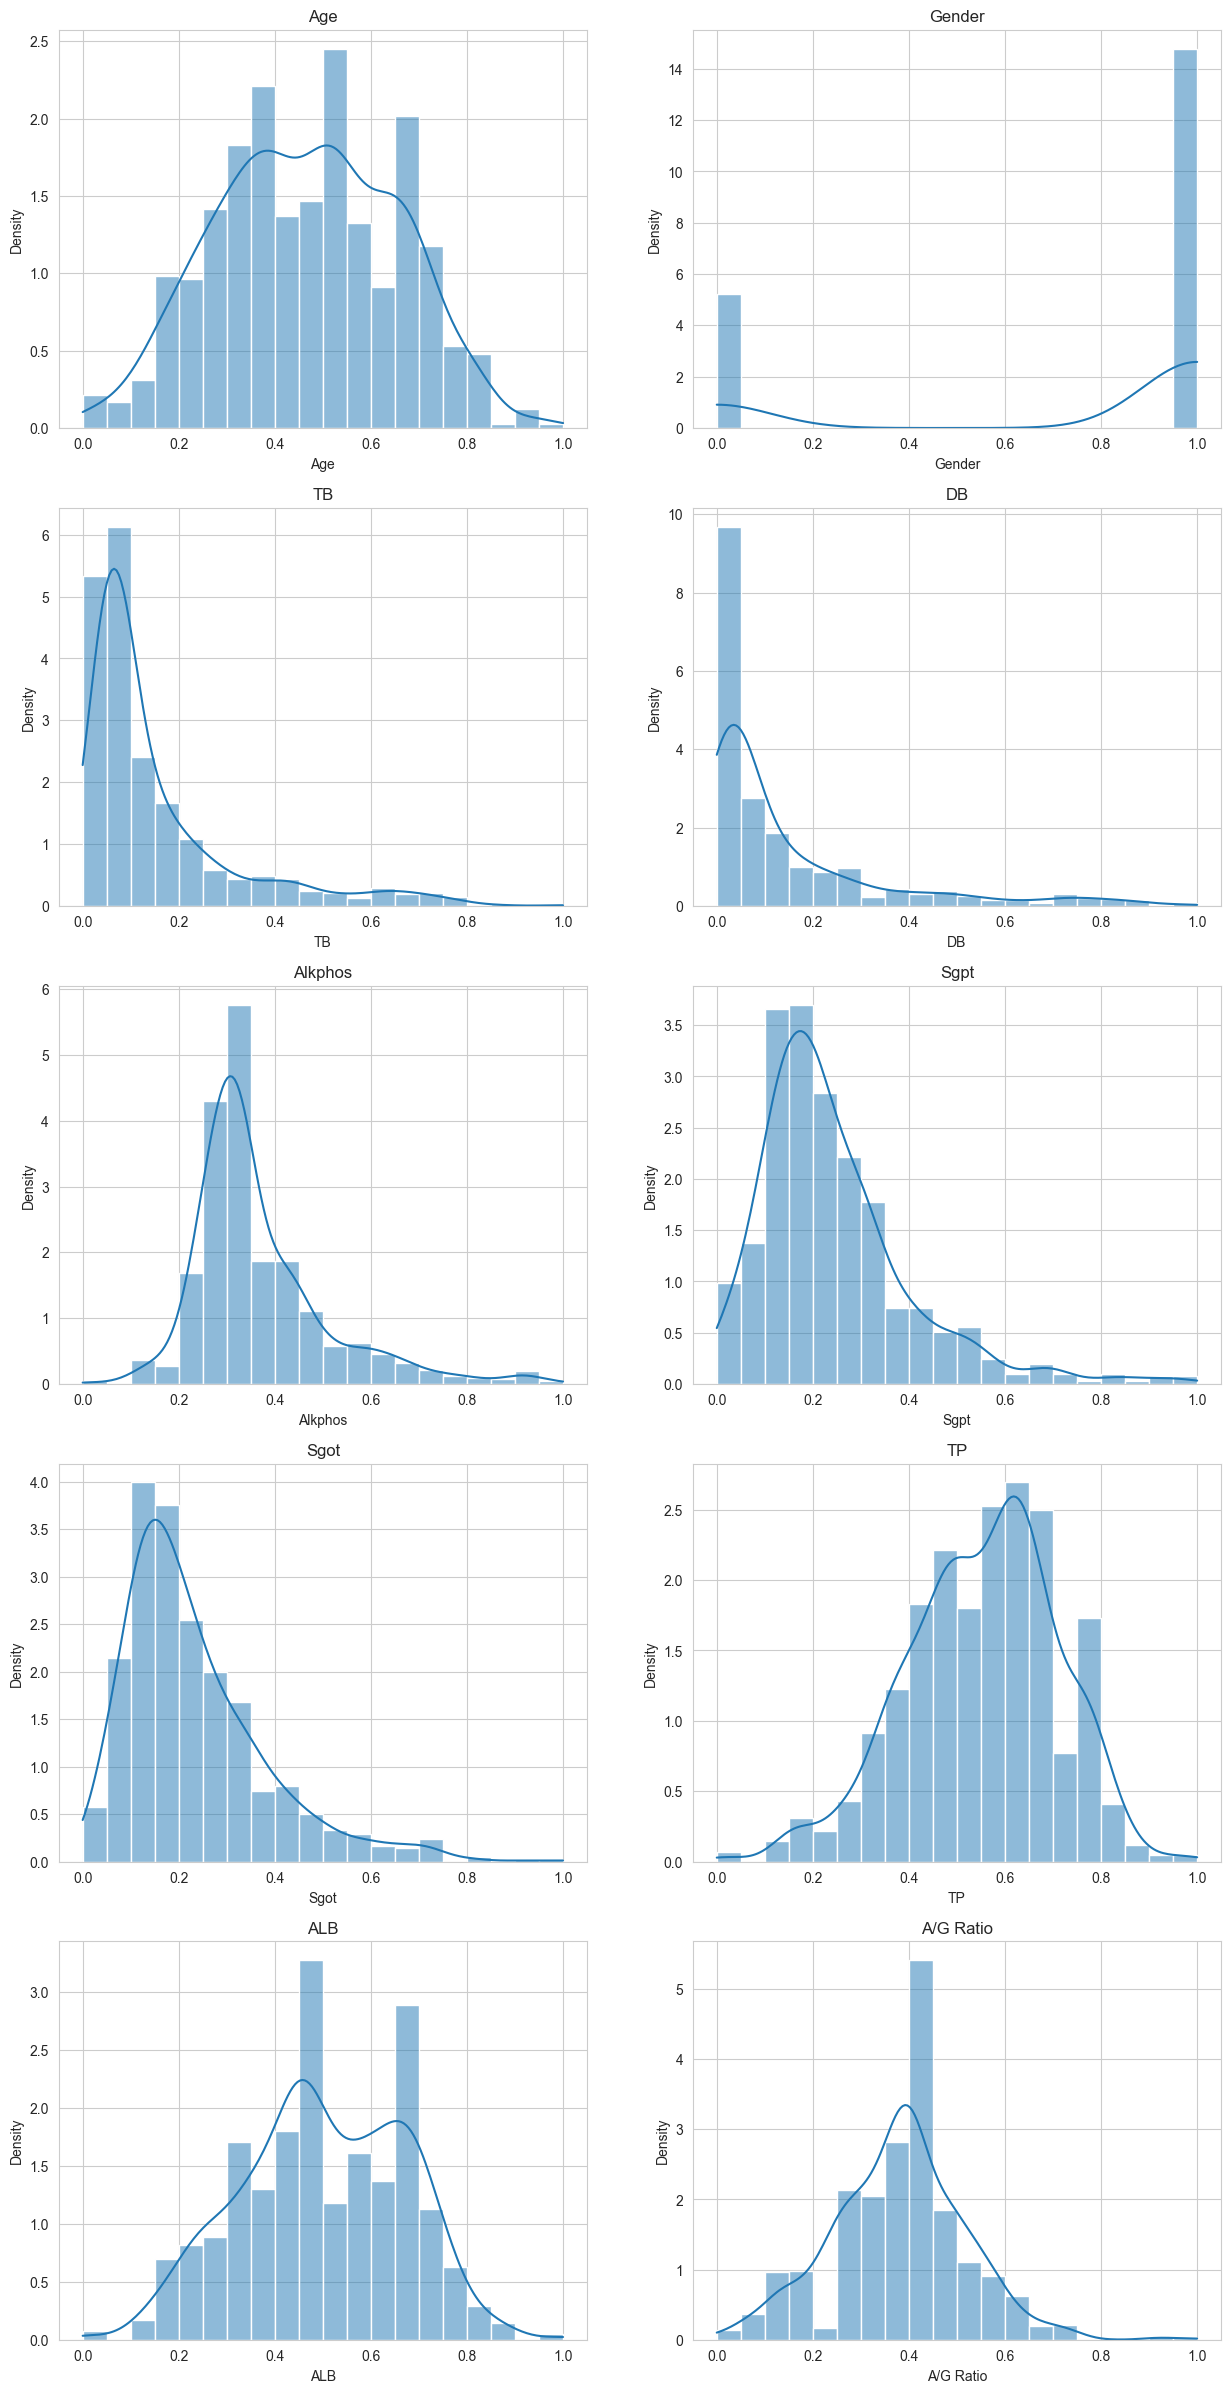

In [38]:
# check the distribution of the features after scaling
plt.figure(figsize=(15,30))
for i in range(len(osx_scaled.columns)):
    plt.subplot(5, 2, i+1)
    sns.histplot(osx_scaled.iloc[:, i], kde=True, stat='density', bins = 20)# set y-axis to be in terms of density
    plt.title(osx_scaled.columns[i])

1. Overall feature slection without stratification by age;
2. Feature selction for those younger than 30;
3. Feature selction for those age between 30 and 60 (including 30 and 60);
4. Feature selction for those older than 60.

Overall Feature selection

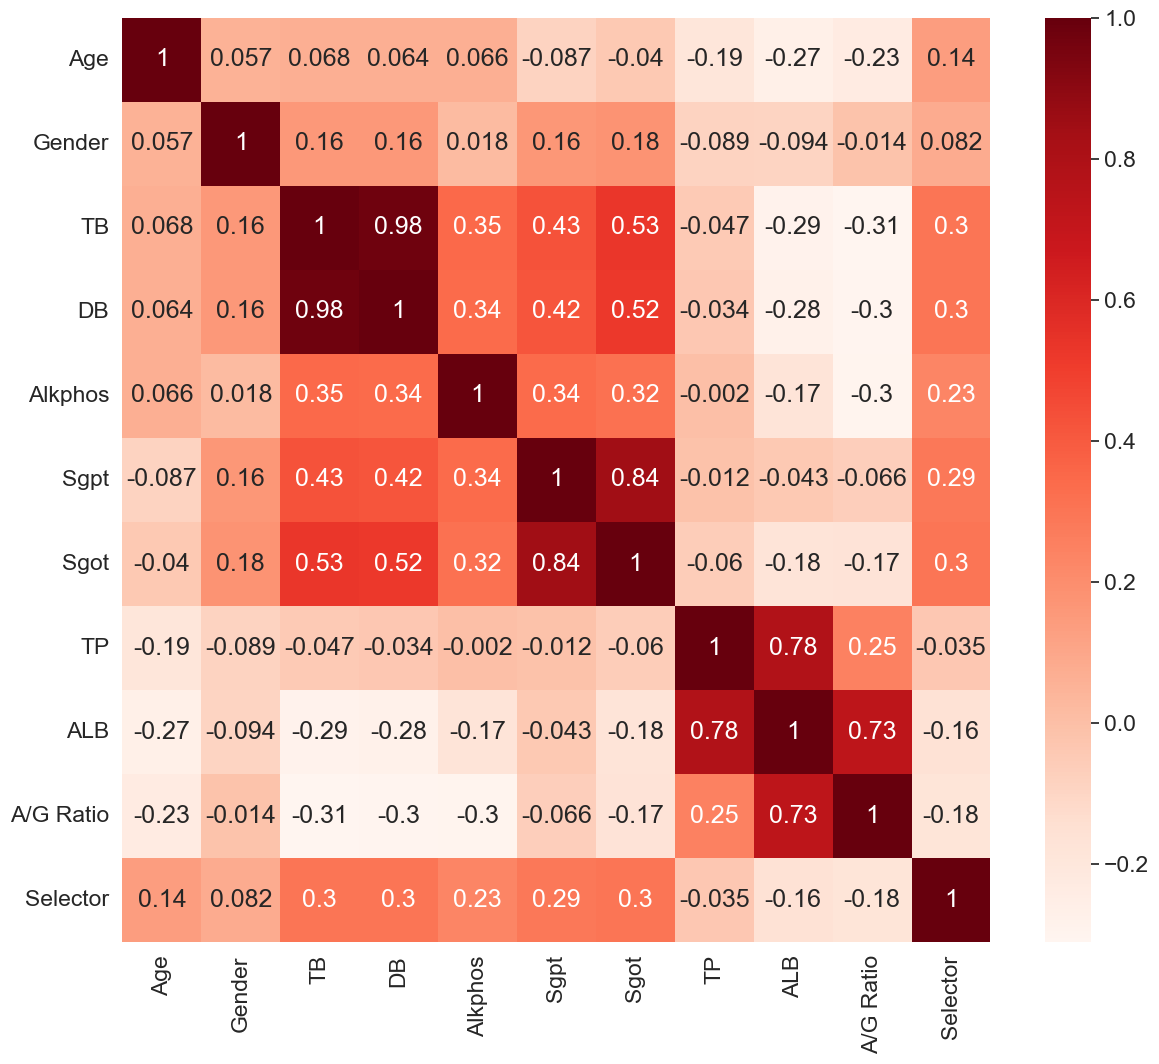

In [39]:
# Feature Selection 1 - Check the correlation between the features

plt.figure(figsize=(14,12))
data = pd.concat([X_imputed, y], axis=1)
correlation = data.corr()
sns.set(font_scale=1.5)
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 1000x600 with 0 Axes>

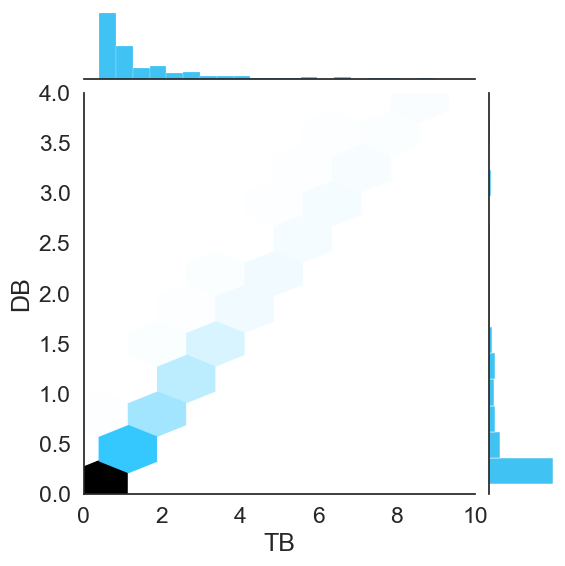

In [40]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.jointplot(x="TB", y="DB", kind="hex", color="#00aeef", data=X)
# adjust the x and y axis limits
plt.xlim(0, 10)
plt.ylim(0, 4)
plt.show()

<Figure size 1000x600 with 0 Axes>

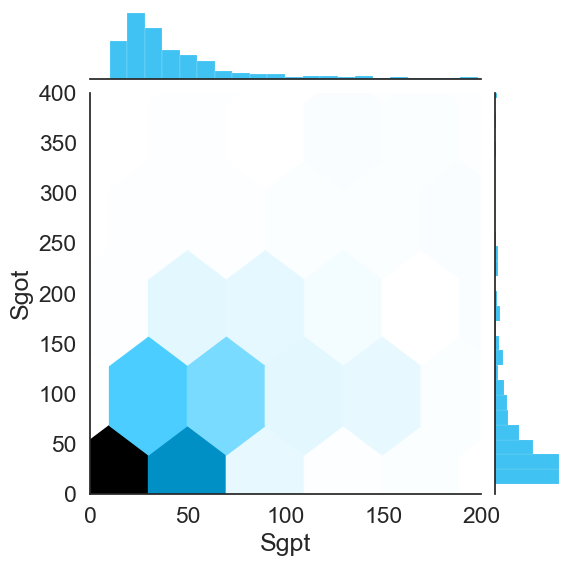

In [41]:
plt.figure(figsize=(10, 6))
sns.jointplot(x="Sgpt", y="Sgot", kind="hex", color="#00aeef", data=X)
# adjust the x and y axis limits
plt.xlim(0, 200)
plt.ylim(0, 400)
plt.show()

<Figure size 1000x600 with 0 Axes>

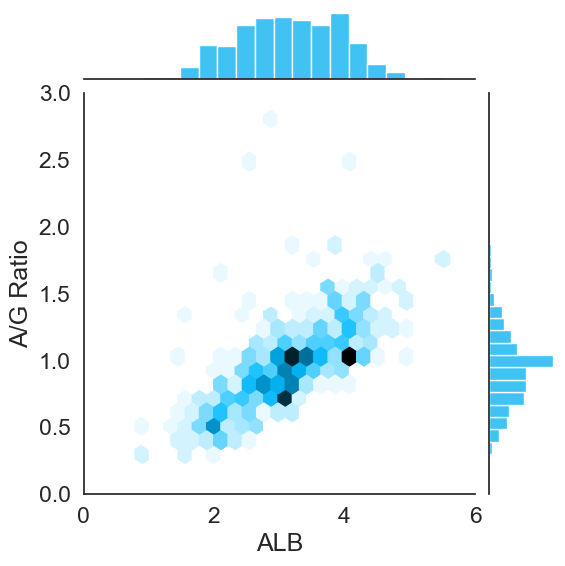

In [42]:
plt.figure(figsize=(10, 6))
sns.jointplot(x="ALB", y="A/G Ratio", kind="hex", color="#00aeef", data=X)
# adjust the x and y axis limits
plt.xlim(0, 6)
plt.ylim(0, 3)
plt.show()

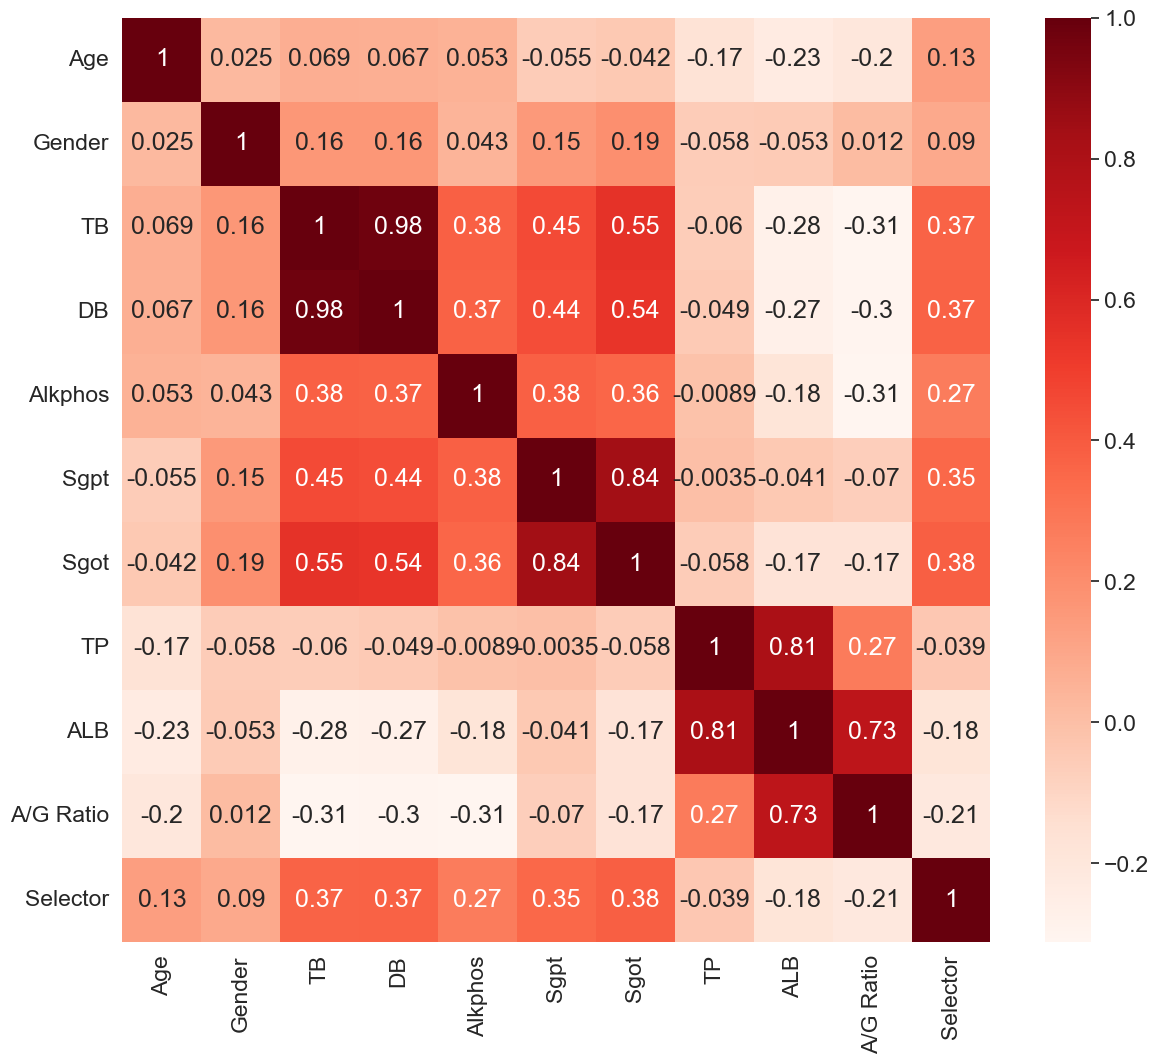

In [43]:
# Correlation Matrix after oversampling and scaling

plt.figure(figsize=(14,12))
data = pd.concat([osx_scaled, osy], axis=1)
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

 Ideally, features selected should be highly correlated to the target variable and not related to each other, otherwise the feature will not add any additional information. Hence, if two features are correlated, we can remove one of them. In this case, We should keep DB, Alkphos, SGOT, A/G Ratio and the Age.<p>
 There are other methods like univariate selection or feature significance, which we can use to determine the final selection.

In [44]:
# use univariate chi-2 feature selection to select the top 5 features

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
X_chi2 = selector.fit_transform(osx_scaled, osy)
tf = selector.get_support()
new_features = osx_scaled.columns[tf]
print(new_features)

Index(['TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot'], dtype='object')


In [45]:
# use feature importance to select the top 5 features

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=11)
clf.fit(osx_scaled,osy)

# Get feature importances
importances = clf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
feature_names = osx_scaled.columns[indices]
top_features = feature_names[:5]

print(top_features)

Index(['Alkphos', 'Sgot', 'Sgpt', 'Age', 'TB'], dtype='object')


c:\Users\roxyl\anaconda3\envs\DLtorch\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [46]:
# report the rank and score of the features
ranked_features = []
for i in range(len(top_features)):
    ranked_features.append((top_features[i], importances[indices[i]]))
print(ranked_features)

[('Alkphos', 0.14641775804372145), ('Sgot', 0.1331117184146538), ('Sgpt', 0.12807716926101576), ('Age', 0.11542069394986866), ('TB', 0.10763043507365767)]


In [47]:
# We finally select TB, Alkphos, SGPT, A/G Ratio and the Age as the top 5 features to build the model.
X_model = osx_scaled[['TB', 'Alkphos', 'Sgpt', 'A/G Ratio', 'Age']]
X_model.head()

,TB,Alkphos,Sgpt,A/G Ratio,Age
0,0.048609,0.308223,0.083659,0.353791,0.709302
1,0.535785,0.684260,0.341403,0.271780,0.674419
2,0.445585,0.582821,0.329197,0.348872,0.674419
3,0.089297,0.300513,0.059605,0.401611,0.627907
4,0.313641,0.320143,0.179554,0.069090,0.790698


In [48]:
final_merged = pd.concat([osx_scaled, osy], axis=1)
final_merged['Age'] = osx['Age']
final_merged['Age_group'] = pd.cut(final_merged['Age'], bins=[0,29,60,90], labels=['<30','30-60','>60'])
print(final_merged.shape)
print(final_merged['Age_group'].value_counts())
final_merged.head()

(832, 12)
Age_group
30-60    528
<30      169
>60      135
Name: count, dtype: int64


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Age_group
0,65.0,0.0,0.048609,0.000000,0.308223,0.083659,0.089521,0.594203,0.521739,0.353791,1,>60
1,62.0,1.0,0.535785,0.605315,0.684260,0.341403,0.363170,0.695652,0.500000,0.271780,1,>60
2,62.0,1.0,0.445585,0.522665,0.582821,0.329197,0.300762,0.623188,0.521739,0.348872,1,>60
3,58.0,1.0,0.089297,0.082173,0.300513,0.059605,0.105914,0.594203,0.543478,0.401611,1,30-60
4,72.0,1.0,0.313641,0.341861,0.320143,0.179554,0.277870,0.666667,0.326087,0.069090,1,>60


In [49]:
# Devide the final_merged data into three independent Dataframe acording to the Age_group column

df_1 = final_merged[final_merged.Age_group == '<30']
df_2 = final_merged[final_merged.Age_group == '30-60']
df_3 = final_merged[final_merged.Age_group == '>60']

In [50]:
# We do not need the Age and Age_group columns after stratisfing the data.

df_1 = df_1.drop(['Age','Age_group'], axis = 1)
df_2 = df_2.drop(['Age','Age_group'], axis = 1)
df_3 = df_3.drop(['Age','Age_group'], axis = 1)

In [51]:
df_1.head()

,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
6,0.0,0.076455,0.029648,0.253013,0.083659,0.027363,0.623188,0.565217,0.401611,1
7,0.0,0.076455,0.056921,0.330181,0.059605,0.014252,0.579710,0.586957,0.447097,1
8,1.0,0.076455,0.056921,0.330181,0.141750,0.097923,0.681159,0.695652,0.490467,0
15,1.0,0.033431,0.000000,0.302072,0.408166,0.260612,0.405797,0.304348,0.250098,0
28,1.0,0.101512,0.105681,0.200493,0.124268,0.169706,0.173913,0.217391,0.378008,0


In [52]:
print(df_1['Selector'].value_counts()) 
print(df_2['Selector'].value_counts())
print(df_3['Selector'].value_counts())

Selector
0    112
1     57
Name: count, dtype: int64
Selector
1    287
0    241
Name: count, dtype: int64
Selector
1    72
0    63
Name: count, dtype: int64


In [53]:
# For each age subgroup, do an oversampling to balance the dataset.(rich data again)

OS = RandomOverSampler(random_state=11)

df_1_x, df_1_y = OS.fit_resample(df_1.drop('Selector', axis = 1), df_1['Selector'])
df_2_x, df_2_y = OS.fit_resample(df_2.drop('Selector', axis = 1), df_2['Selector'])
df_3_x, df_3_y = OS.fit_resample(df_3.drop('Selector', axis = 1), df_3['Selector'])

df_1 = pd.concat([df_1_x, df_1_y], axis=1)
df_2 = pd.concat([df_2_x, df_2_y], axis=1)
df_3 = pd.concat([df_3_x, df_3_y], axis=1)


In [54]:
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(224, 10)
(574, 10)
(144, 10)


Feature Selection for those younger than 30 (df_1)

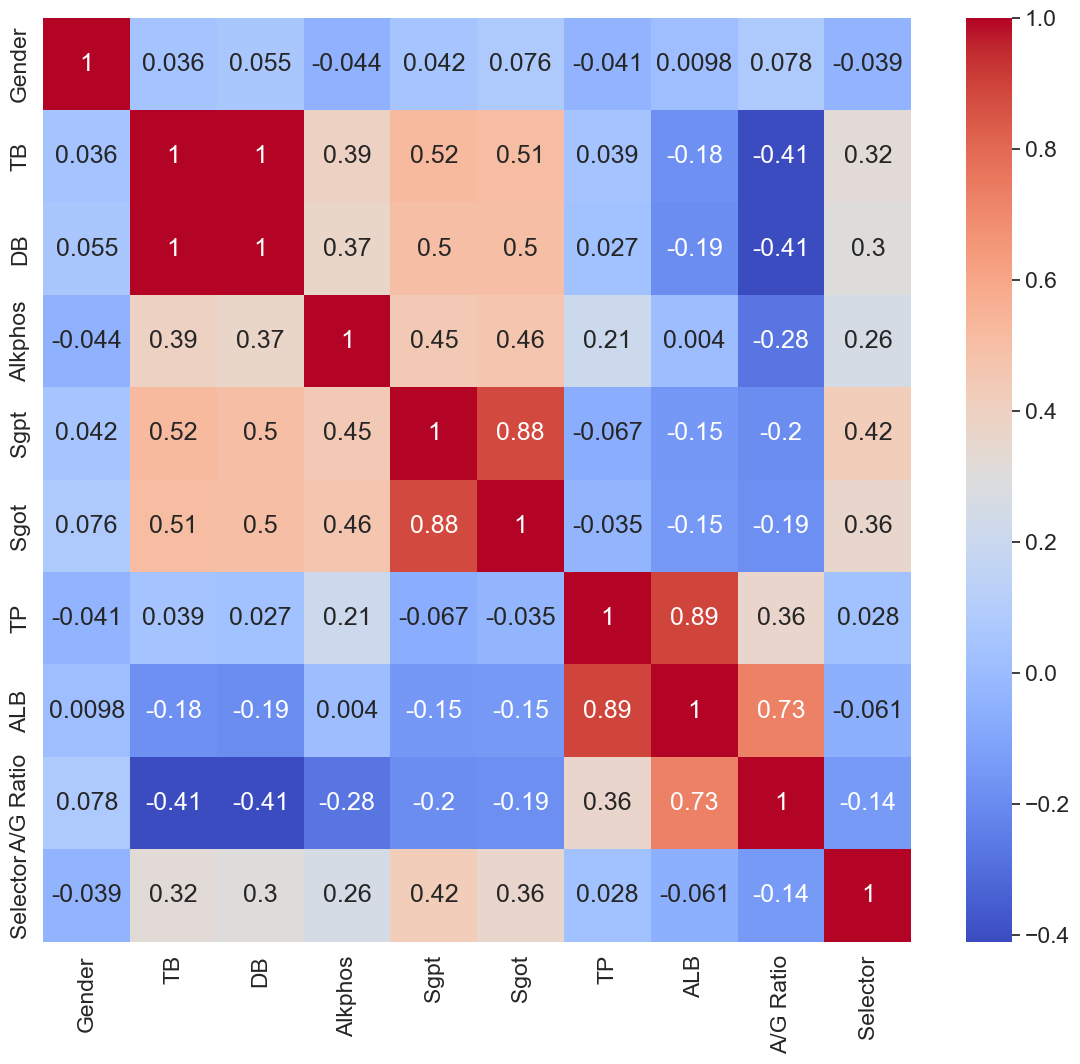

In [55]:
#Method 1 --- Correlation heat map
plt.figure(figsize=(14,12))
correlation = df_1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

This plot demonstrates that the the Sgpt, TB, Sgot, DB and Alkphos are most correlated features to the outcome varaible. However, TB, DB are highly correlated and so as Sgpt and Sgot. Hence, in this case, only one of each correlated feature groups will be kept. To ensure there are still five features remain in the model after deleting collinearty, I choose to get top six features here.

In [56]:
df_1_x = df_1.drop('Selector', axis = 1)
df_1_y = df_1['Selector']

In [57]:
#Method 2 --- Univariate chi-2 feature selection

selector = SelectKBest(chi2, k=6)
X_chi2 = selector.fit_transform(df_1_x, df_1_y)
tf = selector.get_support()
new_features = df_1_x.columns[tf]
print(new_features)

Index(['TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'A/G Ratio'], dtype='object')


In [58]:
#Method 3 ---  use feature importance to select the top 5 features

clf = RandomForestClassifier(random_state=11)
clf.fit(df_1_x, df_1_y)

# Get feature importances
importances = clf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
feature_names = df_1_x.columns[indices]
top_features = feature_names[:6]

print(top_features)

Index(['Sgpt', 'Sgot', 'Alkphos', 'TP', 'ALB', 'TB'], dtype='object')


In [59]:
ranked_features = []
for i in range(len(top_features)):
    ranked_features.append((top_features[i], importances[indices[i]]))
print(ranked_features)

[('Sgpt', 0.1944122309046339), ('Sgot', 0.16103865562460334), ('Alkphos', 0.15170928093012936), ('TP', 0.12575241725959213), ('ALB', 0.0943028905854461), ('TB', 0.09190420130316371)]


All three methods give the same answer which points out the 'Alkphos', 'Sgpt', 'Sgot', 'TP'and 'TB'. After deleting those have collinearity, I decide to choose the Sgpt, Alkphos, TB, TP and ALB to be the five choices as the feature-input for those younger than 30 years old. 

In [60]:
# choose the Sgpt, Alkphos, TB, TP and ALB to be the five choices as the feature-input for those younger than 30 years old.
X_1_model = df_1_x[['Sgpt', 'Alkphos', 'TB', 'TP', 'A/G Ratio']]
X_1_model.head()

,Sgpt,Alkphos,TB,TP,A/G Ratio
0,0.083659,0.253013,0.076455,0.623188,0.401611
1,0.059605,0.330181,0.076455,0.579710,0.447097
2,0.141750,0.330181,0.076455,0.681159,0.490467
3,0.408166,0.302072,0.033431,0.405797,0.250098
4,0.124268,0.200493,0.101512,0.173913,0.378008


Feature Selection for those aged between 30 and 60 (df_2)

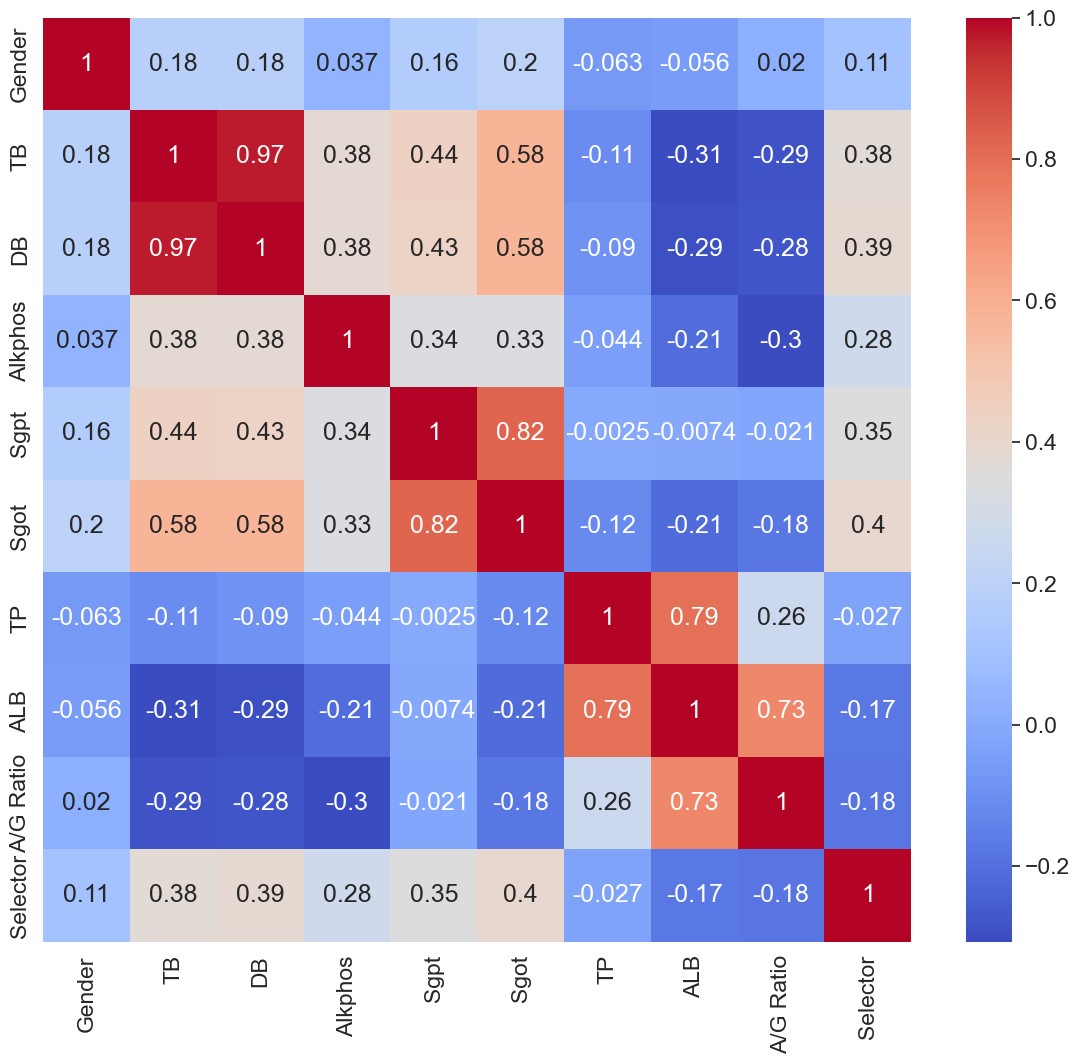

In [61]:
#Method 1 --- Correlation heat map
plt.figure(figsize=(14,12))
correlation = df_2.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [62]:
df_2_x = df_2.drop('Selector', axis = 1)
df_2_y = df_2['Selector']

In [63]:
selector = SelectKBest(chi2, k=6)
X_chi2 = selector.fit_transform(df_2_x, df_2_y)
tf = selector.get_support()
new_features = df_2_x.columns[tf]
print(new_features)

Index(['Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot'], dtype='object')


In [64]:
clf = RandomForestClassifier(random_state=11)
clf.fit(df_2_x, df_2_y)

# Get feature importances
importances = clf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
feature_names = df_2_x.columns[indices]
top_features = feature_names[:6]

print(top_features)

Index(['Alkphos', 'Sgot', 'Sgpt', 'TB', 'DB', 'TP'], dtype='object')


In [65]:
ranked_features = []
for i in range(len(top_features)):
    ranked_features.append((top_features[i], importances[indices[i]]))
print(ranked_features)

[('Alkphos', 0.19960430372159457), ('Sgot', 0.1631153187195636), ('Sgpt', 0.14097326624324846), ('TB', 0.11620821629531265), ('DB', 0.10384036241643932), ('TP', 0.09275129624517389)]


Combine all outputs, I select the Alkphos, Sgot, TB, TP and Gender as the features for individuals aged between 30 and 60.

In [66]:
# choose the Alkphos, Sgot, ALB, TB and Gender as the features for individuals aged between 30 and 60.
X_2_model = df_2_x[['Alkphos', 'Sgot', 'TB', 'TP', 'Gender']]
X_2_model.head()

,Alkphos,Sgot,TB,TP,Gender
0,0.300513,0.105914,0.089297,0.594203,1.0
1,0.338512,0.050802,0.173536,0.710145,1.0
2,0.433188,0.275117,0.048609,0.594203,1.0
3,0.341237,0.277870,0.033431,0.463768,1.0
4,0.480215,0.604962,0.173536,0.710145,1.0


Feature Selection for those aged beyond 60 (df_3)

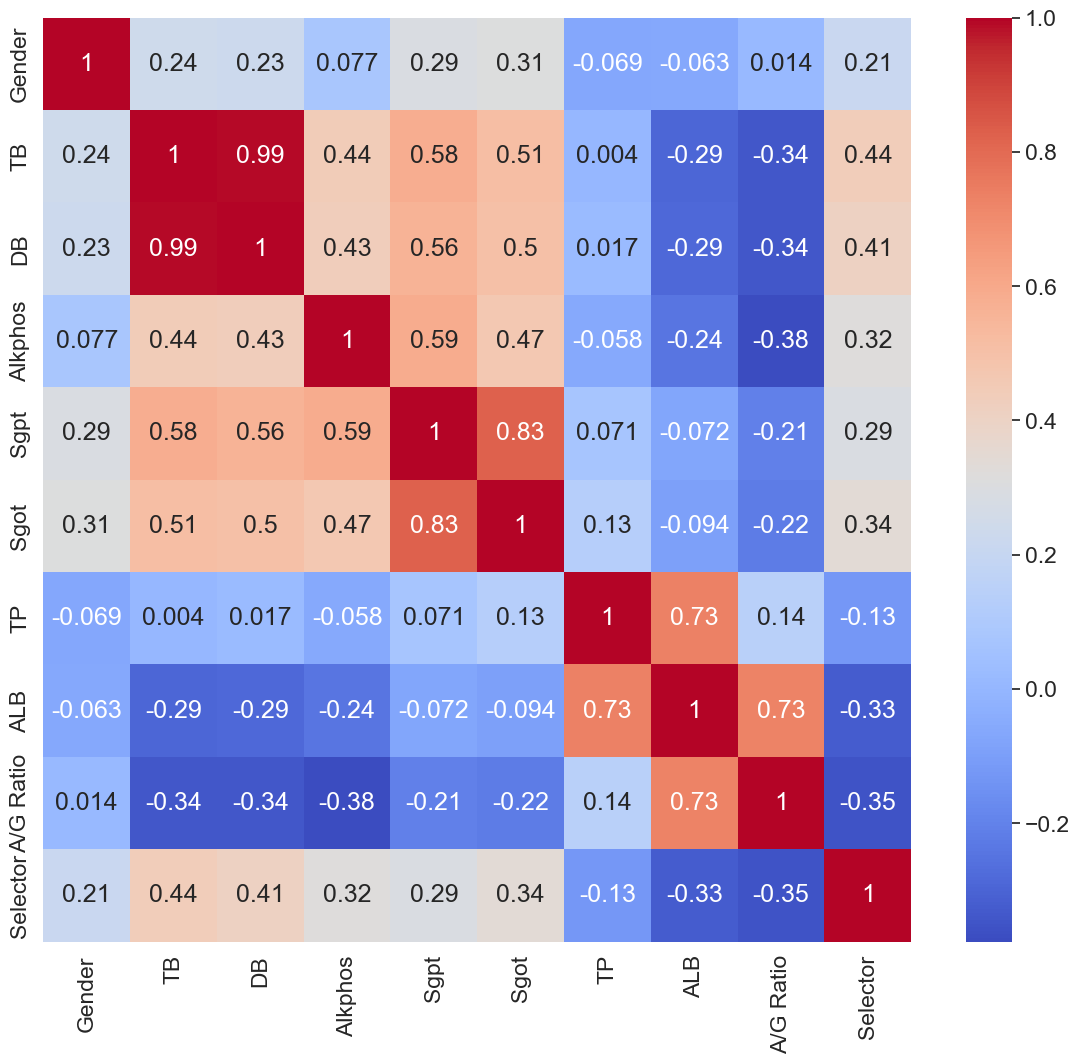

In [67]:
#Method 1 --- Correlation heat map
plt.figure(figsize=(14,12))
correlation = df_3.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [68]:
df_3_x = df_3.drop('Selector', axis = 1)
df_3_y = df_3['Selector']

In [69]:
selector = SelectKBest(chi2, k=6)
X_chi2 = selector.fit_transform(df_3_x, df_3_y)
tf = selector.get_support()
new_features = df_3_x.columns[tf]
print(new_features)

Index(['Gender', 'TB', 'DB', 'Sgpt', 'Sgot', 'A/G Ratio'], dtype='object')


In [70]:
clf = RandomForestClassifier(random_state=11)
clf.fit(df_3_x, df_3_y)

# Get feature importances
importances = clf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
feature_names = df_3_x.columns[indices]
top_features = feature_names[:6]

print(top_features)

Index(['ALB', 'DB', 'Sgot', 'TB', 'A/G Ratio', 'Alkphos'], dtype='object')


In [71]:
ranked_features = []
for i in range(len(top_features)):
    ranked_features.append((top_features[i], importances[indices[i]]))
print(ranked_features)

[('ALB', 0.1771032320248299), ('DB', 0.1438074616791777), ('Sgot', 0.13437584024612054), ('TB', 0.13220285241361918), ('A/G Ratio', 0.11490497750595956), ('Alkphos', 0.09910250295659608)]


Similarly, DB, ALB, Alkphos, Gender and Sgot are selected for those older than 60 years old.

In [72]:
X_3_model = df_3_x[['DB', 'ALB', 'Sgot', 'Alkphos', 'Gender']]
X_3_model.head()

,DB,ALB,Sgot,Alkphos,Gender
0,0.000000,0.521739,0.089521,0.308223,0.0
1,0.605315,0.500000,0.363170,0.684260,1.0
2,0.522665,0.521739,0.300762,0.582821,1.0
3,0.341861,0.326087,0.277870,0.320143,1.0
4,0.251327,0.456522,0.269468,0.402066,1.0


SVM and Random Forest are two models selected for the classification task.<p>
The classification algorithms will be applied also following this order:
1. Overall classificaion without stratification by age;
2. Classification for those younger than 30;
3. Classification for those age between 30 and 60 (including 30 and 60);
4. Classification for those older than 60.

Overall

In [73]:
# Obtain the training data and testing data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model, osy, test_size=0.3, random_state=11)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [74]:
# alorithm 1: SVM to Predict Liver Disease
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

psvc = Pipeline([('clf', SVC(random_state=11))])

param_range = [0.001, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
#param_range = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']},
                 {'clf__C': param_range,
                  'clf__gamma': param_range,
                  'clf__kernel': ['sigmoid']}]



gs = GridSearchCV(estimator=psvc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train, y_train)
svm_overall_accuracy = gs.best_score_

print(svm_overall_accuracy)
print(gs.best_params_)

0.881531268264173
{'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [75]:
# check f1 score
gs = GridSearchCV(estimator=psvc, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train, y_train)
svm_overall_f1 = gs.best_score_

print(svm_overall_f1)
print(gs.best_params_)

0.8910447260447357
{'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [76]:
# check the AUC
gs = GridSearchCV(estimator=psvc, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train, y_train)
svm_overall_auc = gs.best_score_

print(svm_overall_auc)
print(gs.best_params_)

0.9054392446633825
{'clf__C': 5.0, 'clf__gamma': 500.0, 'clf__kernel': 'rbf'}


In [77]:
# check the recall
gs = GridSearchCV(estimator=psvc, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train, y_train)
svm_overall_recall = gs.best_score_

print(svm_overall_recall)
print(gs.best_params_)

0.989408866995074
{'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [78]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=psvc, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train, y_train)
svm_overall_precision = gs.best_score_

print(svm_overall_precision)
print(gs.best_params_)

0.8968253968253969
{'clf__C': 50.0, 'clf__gamma': 0.001, 'clf__kernel': 'sigmoid'}


Accoding to f1 hiest score parameter combination, I decided to use 1.0, 1000gamma rbf kernel as the final hyperparameter.

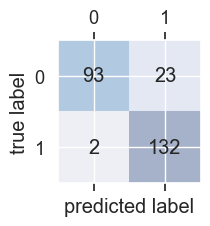

In [79]:
from sklearn.metrics import confusion_matrix

clf = SVC(C=1.0, kernel = 'rbf', gamma = 1000.0, random_state=11)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

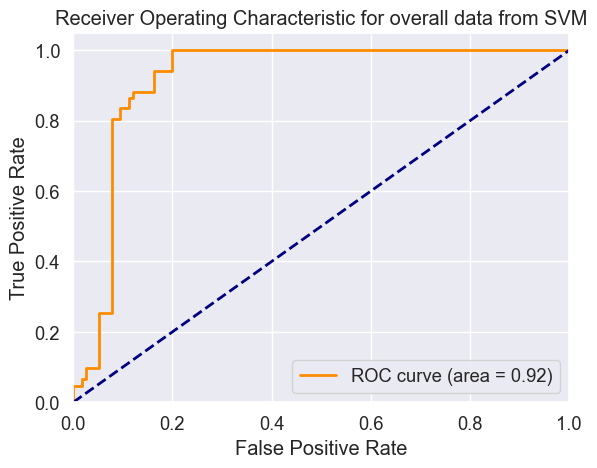

In [80]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc

y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for overall data from SVM')
plt.legend(loc="lower right")
plt.show()


In [81]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

svm_overall_accuracy = accuracy_score(y_test, y_pred)
svm_overall_f1 = f1_score(y_test, y_pred)
svm_overall_recall = recall_score(y_test, y_pred)
svm_overall_precision = precision_score(y_test, y_pred)
svm_overall_auc = roc_auc_score(y_test, y_score)

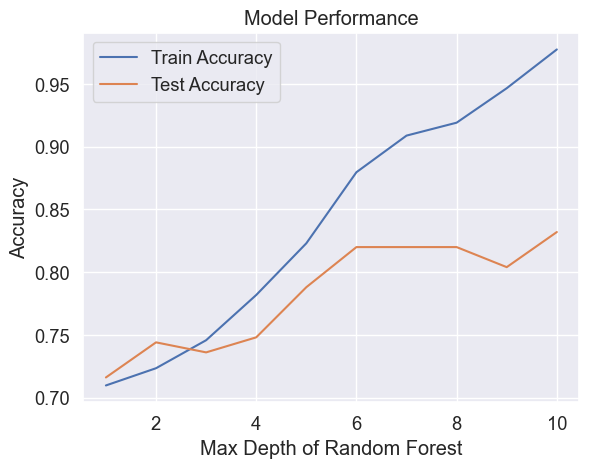

In [82]:
#Random Forest
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = RandomForestClassifier(max_depth=depth, random_state=11)
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth of Random Forest')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.show()

In [83]:
# algorithm 2 Random forest

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=11)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train, y_train)
rf_overall_accuracy = gs.best_score_

print(rf_overall_accuracy)
print(gs.best_params_)

0.780040911747516
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [84]:
# check f1 score
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train, y_train)
rf_overall_f1 = gs.best_score_

print(rf_overall_f1)
print(gs.best_params_)

0.7330779653124295
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [85]:
# check the AUC
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train, y_train)
rf_overall_auc = gs.best_score_

print(rf_overall_auc)
print(gs.best_params_)

0.844384236453202
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [86]:
# check the recall
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train, y_train)
rf_overall_recall = gs.best_score_

print(rf_overall_recall)
print(gs.best_params_)

0.6385467980295567
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [87]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train, y_train)
rf_overall_precision = gs.best_score_

print(rf_overall_precision)
print(gs.best_params_)

0.8759585596460344
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


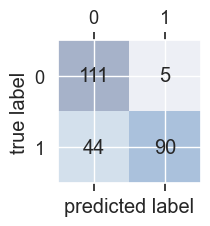

In [88]:
# Choose 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200 to build the model.

rf_clf = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=200, random_state=11)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

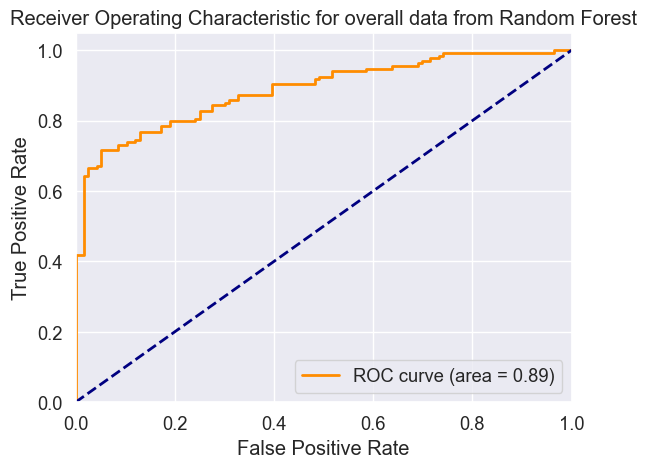

In [89]:
# plot the ROC curve
y_score = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for overall data from Random Forest')
plt.legend(loc="lower right")
plt.show()

In [90]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

rf_overall_accuracy = accuracy_score(y_test, y_pred)
rf_overall_f1 = f1_score(y_test, y_pred)
rf_overall_recall = recall_score(y_test, y_pred)
rf_overall_precision = precision_score(y_test, y_pred)
rf_overall_auc = roc_auc_score(y_test, y_score)

For age < 30

In [91]:
# Obtain the training data and testing data according to df_1.
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1_model, df_1_y, test_size=0.3, random_state=11)
y_train1 = y_train1.values.ravel()
y_test1 = y_test1.values.ravel()

In [92]:
# alorithm 1: SVM to Predict Liver Disease

psvc_1 = Pipeline([('clf', SVC(random_state=11))])

param_range = [0.001, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
#param_range = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']},
                 {'clf__C': param_range,
                  'clf__gamma': param_range,
                  'clf__kernel': ['sigmoid']}]



gs = GridSearchCV(estimator=psvc_1, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
age30_svm_accuracy = gs.best_score_

print(age30_svm_accuracy)
print(gs.best_params_)

0.8658333333333333
{'clf__C': 1.0, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'}


In [93]:
# check f1 score
gs = GridSearchCV(estimator=psvc_1, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
age30_svm_f1 = gs.best_score_

print(age30_svm_f1)
print(gs.best_params_)

0.8727544351073764
{'clf__C': 1.0, 'clf__gamma': 500.0, 'clf__kernel': 'rbf'}


In [94]:
# check the AUC
gs = GridSearchCV(estimator=psvc_1, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
age30_svm_auc = gs.best_score_

print(age30_svm_auc)
print(gs.best_params_)

0.9723214285714287
{'clf__C': 1.0, 'clf__gamma': 500.0, 'clf__kernel': 'rbf'}


In [95]:
# check the recall
gs = GridSearchCV(estimator=psvc_1, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
age30_svm_recall = gs.best_score_

print(age30_svm_recall)
print(gs.best_params_)

0.975
{'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [96]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=psvc_1, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
age30_svm_precision = gs.best_score_

print(age30_svm_precision)
print(gs.best_params_)

0.9214285714285715
{'clf__C': 1.0, 'clf__gamma': 50.0, 'clf__kernel': 'rbf'}


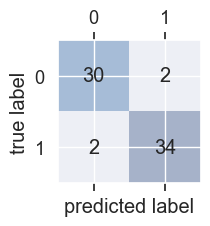

In [97]:
# Choose 'clf__C': 10, 'clf__gamma': 100.0, 'clf__kernel': 'rbf' to build the model.
clf30 = SVC(C=10, gamma=100.0, kernel='rbf', random_state=11)
clf30.fit(X_train1, y_train1)
y_pred = clf30.predict(X_test1)
confmat = confusion_matrix(y_true=y_test1, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

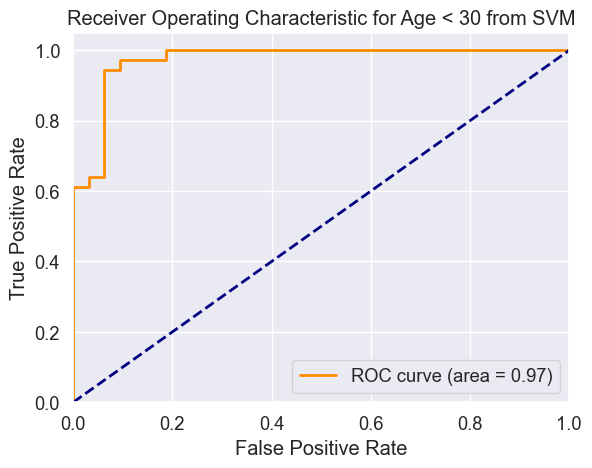

In [98]:
# plot the ROC curve
y_score = clf30.decision_function(X_test1)
fpr, tpr, _ = roc_curve(y_test1, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Age < 30 from SVM') 
plt.legend(loc="lower right")
plt.show()

In [99]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

age30_svm_accuracy = accuracy_score(y_test1, y_pred)
age30_svm_f1 = f1_score(y_test1, y_pred)
age30_svm_recall = recall_score(y_test1, y_pred)
age30_svm_precision = precision_score(y_test1, y_pred)
age30_svm_auc = roc_auc_score(y_test1, y_score)

In [100]:
# algorithm 2 Random forest

rf_1 = RandomForestClassifier(random_state=11)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

gs = GridSearchCV(estimator=rf_1, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
rf_age30_accuracy = gs.best_score_

print(rf_age30_accuracy)
print(gs.best_params_)

0.8458333333333334
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [101]:
# check f1 score
gs = GridSearchCV(estimator=rf_1, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
rf_age30_f1 = gs.best_score_

print(rf_age30_f1)
print(gs.best_params_)

0.8197802197802199
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [102]:
# check auc score
gs = GridSearchCV(estimator=rf_1, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
rf_age30_auc = gs.best_score_

print(rf_age30_auc)
print(gs.best_params_)

0.9158482142857143
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}


In [103]:
# check recall 
gs = GridSearchCV(estimator=rf_1, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
rf_age30_recall = gs.best_score_

print(rf_age30_recall)
print(gs.best_params_)

0.7392857142857142
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [104]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=rf_1, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train1, y_train1)
rf_age30_precision = gs.best_score_

print(rf_age30_precision)
print(gs.best_params_)

0.9333333333333333
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


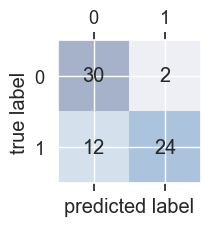

In [105]:
# Choose 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200 to build the model.
rf_30 = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', n_estimators=200, random_state=11)
rf_30.fit(X_train1, y_train1)
y_pred = rf_30.predict(X_test1)
confmat = confusion_matrix(y_true=y_test1, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

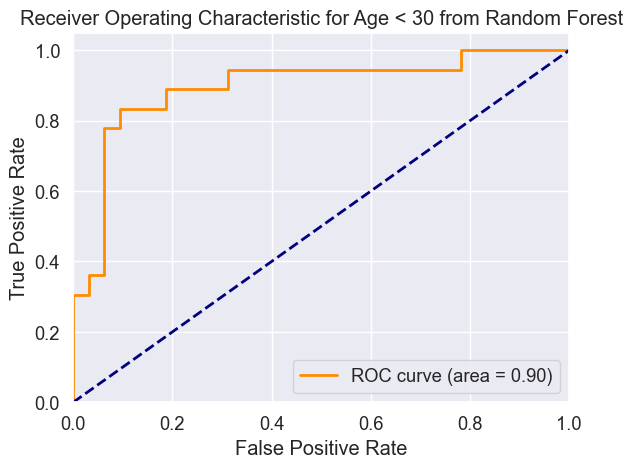

In [106]:
# plot the ROC curve
y_score = rf_30.predict_proba(X_test1)[:,1]
fpr, tpr, _ = roc_curve(y_test1, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Age < 30 from Random Forest')
plt.legend(loc="lower right")
plt.show()

In [107]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

rf_age30_accuracy = accuracy_score(y_test1, y_pred)
rf_age30_f1 = f1_score(y_test1, y_pred)
rf_age30_recall = recall_score(y_test1, y_pred)
rf_age30_precision = precision_score(y_test1, y_pred)
rf_age30_auc = roc_auc_score(y_test1, y_score)

For aged between 30 and 60:

In [108]:
# Obtain the training data and testing data according to df_2.
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2_model, df_2_y, test_size=0.3, random_state=11)
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()

In [109]:
# alorithm 1: SVM to Predict Liver Disease

psvc_2 = Pipeline([('clf', SVC(random_state=11))])

param_range = [0.001, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
#param_range = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']},
                 {'clf__C': param_range,
                  'clf__gamma': param_range,
                  'clf__kernel': ['sigmoid']}]



gs = GridSearchCV(estimator=psvc_2, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
age30_60_svm_accuracy = gs.best_score_

print(age30_60_svm_accuracy)
print(gs.best_params_)

0.8804878048780488
{'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [110]:
# check f1 score
gs = GridSearchCV(estimator=psvc_2, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
age30_60_svm_f1 = gs.best_score_

print(age30_60_svm_f1)
print(gs.best_params_)

0.8931662902315075
{'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [111]:
# check the AUC
gs = GridSearchCV(estimator=psvc_2, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
age30_60_svm_auc = gs.best_score_

print(age30_60_svm_auc)
print(gs.best_params_)

0.8788132832080201
{'clf__C': 5.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'}


In [112]:
# check the recall
gs = GridSearchCV(estimator=psvc_2, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
age30_60_svm_recall = gs.best_score_

print(age30_60_svm_recall)
print(gs.best_params_)

1.0
{'clf__C': 0.001, 'clf__kernel': 'linear'}


In [113]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=psvc_2, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
age30_60_svm_precision = gs.best_score_

print(age30_60_svm_precision)
print(gs.best_params_)

0.8852246759947999
{'clf__C': 5.0, 'clf__gamma': 50.0, 'clf__kernel': 'rbf'}


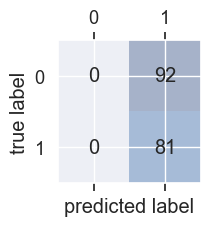

In [114]:
# choose {'clf__C': 0.001, 'clf__kernel': 'linear'} to build the model.
clf30_60 = SVC(C=0.001, kernel='linear', random_state=11)
clf30_60.fit(X_train2, y_train2)
y_pred = clf30_60.predict(X_test2)
confmat = confusion_matrix(y_true=y_test2, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

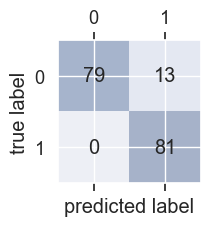

In [115]:
# choose {'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'} to build the model.
clf30_60 = SVC(C=1.0, gamma=1000.0, kernel='rbf', random_state=11)
clf30_60.fit(X_train2, y_train2)
y_pred = clf30_60.predict(X_test2)
confmat = confusion_matrix(y_true=y_test2, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

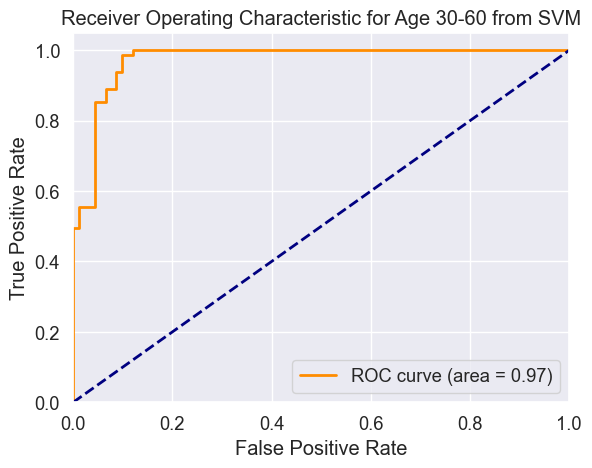

In [116]:
# plot the ROC curve
y_score = clf30_60.decision_function(X_test2)
fpr, tpr, _ = roc_curve(y_test2, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Age 30-60 from SVM')
plt.legend(loc="lower right")
plt.show()

In [117]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

age30_60_svm_accuracy = accuracy_score(y_test2, y_pred)
age30_60_svm_f1 = f1_score(y_test2, y_pred)
age30_60_svm_recall = recall_score(y_test2, y_pred)
age30_60_svm_precision = precision_score(y_test2, y_pred)
age30_60_svm_auc = roc_auc_score(y_test2, y_score)

In [118]:
# algorithm 2 Random forest

rf_2 = RandomForestClassifier(random_state=11)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

gs = GridSearchCV(estimator=rf_2, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)

rf_age30_60_accuracy = gs.best_score_
print(rf_age30_60_accuracy)
print(gs.best_params_)

0.8381097560975611
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}


In [119]:
# check f1 score
gs = GridSearchCV(estimator=rf_2, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
rf_age30_60_f1 = gs.best_score_

print(rf_age30_60_f1)
print(gs.best_params_)

0.8279299431113399
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [120]:
# check auc score
gs = GridSearchCV(estimator=rf_2, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
rf_age30_60_auc = gs.best_score_

print(rf_age30_60_auc)
print(gs.best_params_)

0.8873840852130325
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [121]:
# check recall 
gs = GridSearchCV(estimator=rf_2, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
rf_age30_60_recall = gs.best_score_

print(rf_age30_60_recall)
print(gs.best_params_)

0.7733333333333333
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [122]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=rf_2, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train2, y_train2)
rf_age30_60_precision = gs.best_score_

print(rf_age30_60_precision)
print(gs.best_params_)

0.9112323422191844
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}


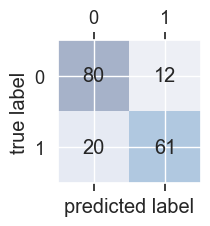

In [123]:
# Choose 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100} to build the model.
rf_30_60 = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=200, random_state=11)
rf_30_60.fit(X_train2, y_train2)
y_pred = rf_30_60.predict(X_test2)
confmat = confusion_matrix(y_true=y_test2, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

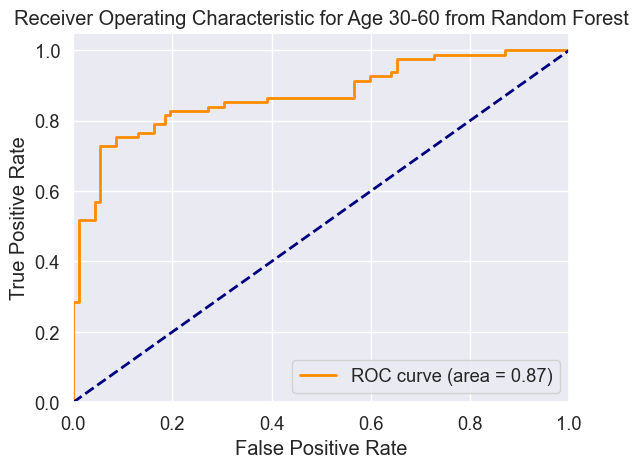

In [124]:
# plot the ROC curve
y_score = rf_30_60.predict_proba(X_test2)[:,1]
fpr, tpr, _ = roc_curve(y_test2, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Age 30-60 from Random Forest')
plt.legend(loc="lower right")
plt.show()

In [125]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

rf_age30_60_accuracy = accuracy_score(y_test2, y_pred)
rf_age30_60_f1 = f1_score(y_test2, y_pred)
rf_age30_60_recall = recall_score(y_test2, y_pred)
rf_age30_60_precision = precision_score(y_test2, y_pred)
rf_age30_60_auc = roc_auc_score(y_test2, y_score)

For age > 60:


In [126]:
# Obtain the training data and testing data according to df_3.
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3_model, df_3_y, test_size=0.3, random_state=11)
y_train3 = y_train3.values.ravel()
y_test3 = y_test3.values.ravel()

In [127]:
# alorithm 1: SVM to Predict Liver Disease

psvc_3 = Pipeline([('clf', SVC(random_state=11))])

param_range = [0.001, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
#param_range = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']},
                 {'clf__C': param_range,
                  'clf__gamma': param_range,
                  'clf__kernel': ['sigmoid']}]



gs = GridSearchCV(estimator=psvc_3, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
age60_svm_accuracy = gs.best_score_

print(age60_svm_accuracy)
print(gs.best_params_)

0.93
{'clf__C': 1.0, 'clf__gamma': 500.0, 'clf__kernel': 'rbf'}


In [128]:
# check f1 score
gs = GridSearchCV(estimator=psvc_3, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
age60_svm_f1 = gs.best_score_

print(age60_svm_f1)
print(gs.best_params_)

0.9374592074592074
{'clf__C': 1.0, 'clf__gamma': 500.0, 'clf__kernel': 'rbf'}


In [129]:
# check the AUC
gs = GridSearchCV(estimator=psvc_3, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
age60_svm_auc = gs.best_score_

print(age60_svm_auc)
print(gs.best_params_)

0.932
{'clf__C': 0.001, 'clf__gamma': 500.0, 'clf__kernel': 'rbf'}


In [130]:
# check the recall
gs = GridSearchCV(estimator=psvc_3, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
age60_svm_recall = gs.best_score_

print(age60_svm_recall)
print(gs.best_params_)

1.0
{'clf__C': 0.001, 'clf__kernel': 'linear'}


In [131]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=psvc_3, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
age60_svm_precision = gs.best_score_

print(age60_svm_precision)
print(gs.best_params_)

0.9457142857142857
{'clf__C': 500.0, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'}


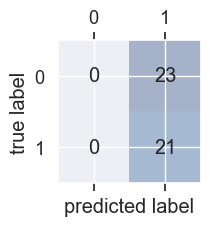

In [132]:
# choose 'clf__C': 0.1, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'} to build the model.

clf60 = SVC(C=0.1, gamma=1000.0, kernel='rbf', random_state=11)
clf60.fit(X_train3, y_train3)
y_pred = clf60.predict(X_test3)
confmat = confusion_matrix(y_true=y_test3, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

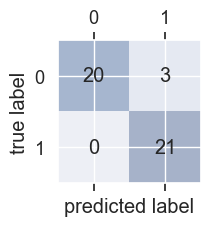

In [133]:
# choose 'clf__C': 1.0, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'} to build the model.

clf60 = SVC(C=1.0, gamma=1000.0, kernel='rbf', random_state=11)
clf60.fit(X_train3, y_train3)
y_pred = clf60.predict(X_test3)
confmat = confusion_matrix(y_true=y_test3, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

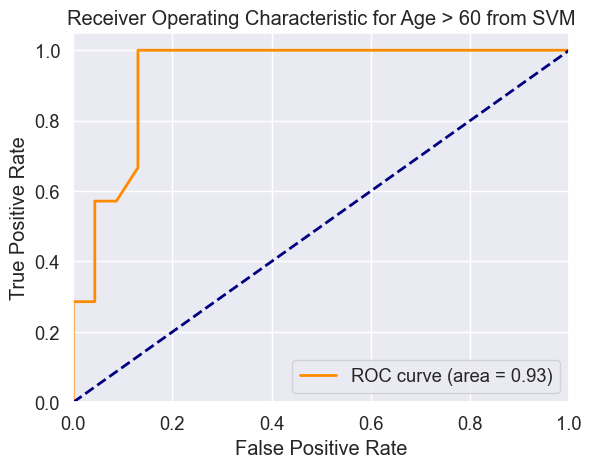

In [134]:
# plot the ROC curve
y_score = clf60.decision_function(X_test3)
fpr, tpr, _ = roc_curve(y_test3, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Age > 60 from SVM')
plt.legend(loc="lower right")
plt.show()

In [135]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

age60_svm_accuracy = accuracy_score(y_test3, y_pred)
age60_svm_f1 = f1_score(y_test3, y_pred)
age60_svm_recall = recall_score(y_test3, y_pred)
age60_svm_precision = precision_score(y_test3, y_pred)
age60_svm_auc = roc_auc_score(y_test3, y_score)

In [136]:
# algorithm 2 Random forest

rf_3 = RandomForestClassifier(random_state=11)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']}

gs = GridSearchCV(estimator=rf_3, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
rf_age60_accuracy = gs.best_score_

print(rf_age60_accuracy)
print(gs.best_params_)

0.9100000000000001
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [137]:
# check f1 score
gs = GridSearchCV(estimator=rf_3, 
                  param_grid=param_grid, 
                  scoring = 'f1', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
rf_age60_f1 = gs.best_score_

print(rf_age60_f1)
print(gs.best_params_)

0.8964646464646465
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [138]:
# check auc score
gs = GridSearchCV(estimator=rf_3, 
                  param_grid=param_grid, 
                  scoring = 'roc_auc', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
rf_age60_auc = gs.best_score_

print(rf_age60_auc)
print(gs.best_params_)

0.96
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}


In [139]:
# check recall 
gs = GridSearchCV(estimator=rf_3, 
                  param_grid=param_grid, 
                  scoring = 'recall', 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
rf_age60_recall = gs.best_score_

print(rf_age60_recall)
print(gs.best_params_)

0.8233333333333335
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [140]:
# check the precision
from sklearn.metrics import make_scorer, precision_score

gs = GridSearchCV(estimator=rf_3, 
                  param_grid=param_grid, 
                  scoring=make_scorer(precision_score, zero_division=0), 
                  cv=10)

gs = gs.fit(X_train3, y_train3)
rf_age60_precision = gs.best_score_

print(rf_age60_precision)
print(gs.best_params_)

1.0
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


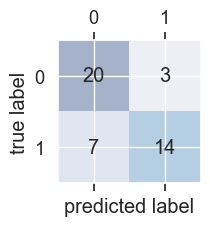

In [141]:
# Choose 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300 to build the model.

rf_60 = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=300, random_state=11)
rf_60.fit(X_train3, y_train3)
y_pred = rf_60.predict(X_test3)
confmat = confusion_matrix(y_true=y_test3, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

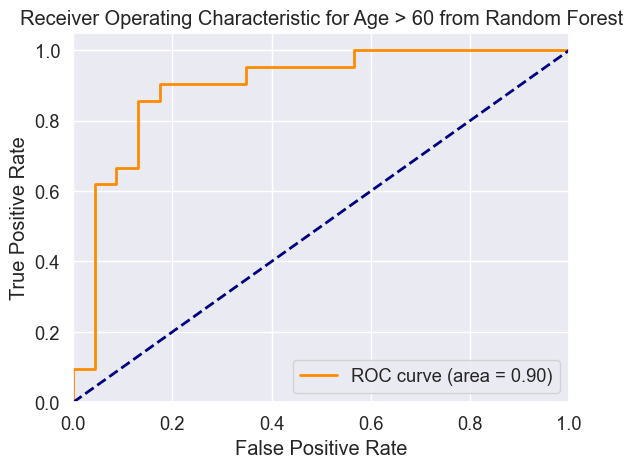

In [142]:
# plot the ROC curve
y_score = rf_60.predict_proba(X_test3)[:,1]
fpr, tpr, _ = roc_curve(y_test3, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Age > 60 from Random Forest')
plt.legend(loc="lower right")
plt.show()


In [143]:
# print the accuracy, f1 score, recall, precision and AUC depending on this hyperparameter combination

rf_age60_accuracy = accuracy_score(y_test3, y_pred)
rf_age60_f1 = f1_score(y_test3, y_pred)
rf_age60_recall = recall_score(y_test3, y_pred)
rf_age60_precision = precision_score(y_test3, y_pred)
rf_age60_auc = roc_auc_score(y_test3, y_score)

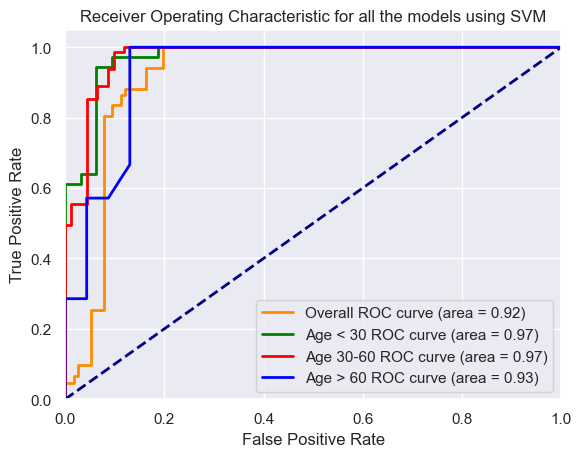

In [144]:
# plot the ROC curve for all the models using SVM (4 cases)

clf_overall = SVC(C=1.0, gamma=1000.0, kernel='rbf', random_state=11)
clf_overall.fit(X_train, y_train)
y_score_overall = clf_overall.decision_function(X_test)
fpr_overall, tpr_overall, _ = roc_curve(y_test, y_score_overall)
roc_auc_overall = auc(fpr_overall, tpr_overall)

clf_30 = SVC(C=10.0, gamma=100.0, kernel='rbf', random_state=11)
clf_30.fit(X_train1, y_train1)
y_score_30 = clf_30.decision_function(X_test1)
fpr_30, tpr_30, _ = roc_curve(y_test1, y_score_30)
roc_auc_30 = auc(fpr_30, tpr_30)

clf_30_60 = SVC(C=1.0, gamma=1000.0, kernel='rbf', random_state=11)
clf_30_60.fit(X_train2, y_train2)   
y_score_30_60 = clf_30_60.decision_function(X_test2)
fpr_30_60, tpr_30_60, _ = roc_curve(y_test2, y_score_30_60)
roc_auc_30_60 = auc(fpr_30_60, tpr_30_60)

clf_60 = SVC(C=1.0, gamma=1000.0, kernel='rbf', random_state=11)
clf_60.fit(X_train3, y_train3)
y_score_60 = clf_60.decision_function(X_test3)
fpr_60, tpr_60, _ = roc_curve(y_test3, y_score_60)
roc_auc_60 = auc(fpr_60, tpr_60)

sns.set(font_scale=1.0)
plt.figure()
lw = 2
plt.plot(fpr_overall, tpr_overall, color='darkorange', lw=lw, label='Overall ROC curve (area = %0.2f)' % roc_auc_overall)
plt.plot(fpr_30, tpr_30, color='green', lw=lw, label='Age < 30 ROC curve (area = %0.2f)' % roc_auc_30)
plt.plot(fpr_30_60, tpr_30_60, color='red', lw=lw, label='Age 30-60 ROC curve (area = %0.2f)' % roc_auc_30_60)
plt.plot(fpr_60, tpr_60, color='blue', lw=lw, label='Age > 60 ROC curve (area = %0.2f)' % roc_auc_60)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all the models using SVM')
plt.legend(loc="lower right")
plt.show()

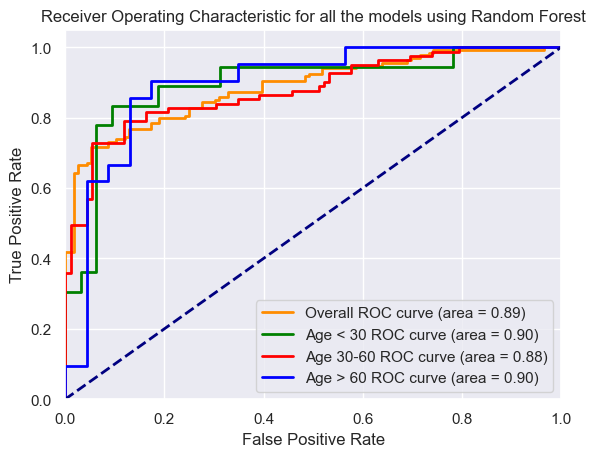

In [145]:
# plot the ROC curve for all the models using random forest (4 cases)

rf_overall = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=200, random_state=11)
rf_overall.fit(X_train, y_train)
y_score_overall = rf_overall.predict_proba(X_test)[:,1]
fpr_overall, tpr_overall, _ = roc_curve(y_test, y_score_overall)
roc_auc_overall = auc(fpr_overall, tpr_overall)

rf_30 = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', n_estimators=200, random_state=11)
rf_30.fit(X_train1, y_train1)
y_score_30 = rf_30.predict_proba(X_test1)[:,1]
fpr_30, tpr_30, _ = roc_curve(y_test1, y_score_30)
roc_auc_30 = auc(fpr_30, tpr_30)

rf_30_60 = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=100, random_state=11)
rf_30_60.fit(X_train2, y_train2)
y_score_30_60 = rf_30_60.predict_proba(X_test2)[:,1]
fpr_30_60, tpr_30_60, _ = roc_curve(y_test2, y_score_30_60)
roc_auc_30_60 = auc(fpr_30_60, tpr_30_60)

rf_60 = RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', n_estimators=300, random_state=11)
rf_60.fit(X_train3, y_train3)
y_score_60 = rf_60.predict_proba(X_test3)[:,1]
fpr_60, tpr_60, _ = roc_curve(y_test3, y_score_60)
roc_auc_60 = auc(fpr_60, tpr_60)

plt.figure()
lw = 2
plt.plot(fpr_overall, tpr_overall, color='darkorange', lw=lw, label='Overall ROC curve (area = %0.2f)' % roc_auc_overall)
plt.plot(fpr_30, tpr_30, color='green', lw=lw, label='Age < 30 ROC curve (area = %0.2f)' % roc_auc_30)
plt.plot(fpr_30_60, tpr_30_60, color='red', lw=lw, label='Age 30-60 ROC curve (area = %0.2f)' % roc_auc_30_60)
plt.plot(fpr_60, tpr_60, color='blue', lw=lw, label='Age > 60 ROC curve (area = %0.2f)' % roc_auc_60)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for all the models using Random Forest')
plt.legend(loc="lower right")
plt.show()

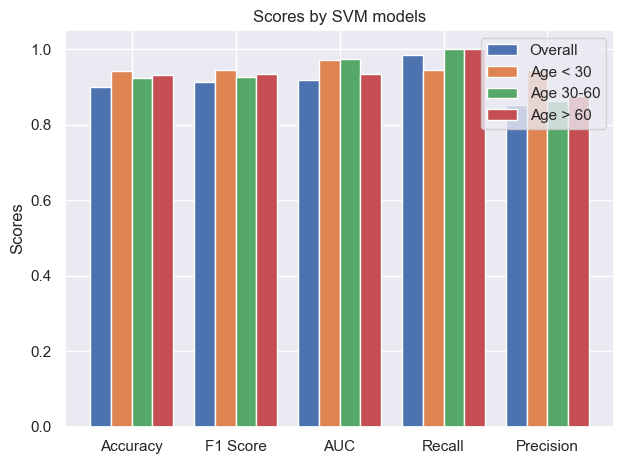

In [146]:
age_overall_score = [svm_overall_accuracy, svm_overall_f1, svm_overall_auc, svm_overall_recall, svm_overall_precision]
age30_score = [age30_svm_accuracy, age30_svm_f1, age30_svm_auc, age30_svm_recall, age30_svm_precision]
age30_60_score = [age30_60_svm_accuracy, age30_60_svm_f1, age30_60_svm_auc, age30_60_svm_recall, age30_60_svm_precision]
age60_score = [age60_svm_accuracy, age60_svm_f1, age60_svm_auc, age60_svm_recall, age60_svm_precision]

labels = ['Accuracy', 'F1 Score', 'AUC', 'Recall', 'Precision']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, age_overall_score, width, label='Overall')
rects2 = ax.bar(x - 0.5*width, age30_score, width, label='Age < 30')
rects3 = ax.bar(x + 0.5*width, age30_60_score, width, label='Age 30-60')
rects4 = ax.bar(x + 1.5*width, age60_score, width, label='Age > 60')

ax.set_ylabel('Scores')
ax.set_title('Scores by SVM models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [147]:
print(svm_overall_accuracy)
print(age30_svm_accuracy)
print(age30_60_svm_accuracy)
print(age60_svm_accuracy)

0.9
0.9411764705882353
0.9248554913294798
0.9318181818181818


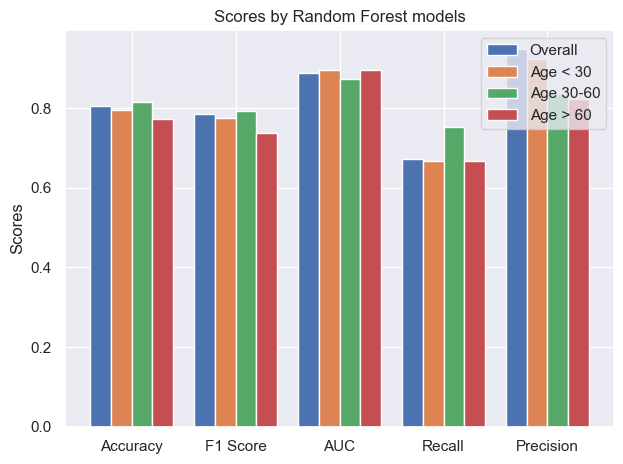

In [148]:
# For those random forest models, use barcharts to compare the accuracy, f1 score, AUC, recall, and precision.

age_overall_score = [rf_overall_accuracy, rf_overall_f1, rf_overall_auc, rf_overall_recall, rf_overall_precision]
age30_score = [rf_age30_accuracy, rf_age30_f1, rf_age30_auc, rf_age30_recall, rf_age30_precision]
age30_60_score = [rf_age30_60_accuracy, rf_age30_60_f1, rf_age30_60_auc, rf_age30_60_recall, rf_age30_60_precision]
age60_score = [rf_age60_accuracy, rf_age60_f1, rf_age60_auc, rf_age60_recall, rf_age60_precision]

labels = ['Accuracy', 'F1 Score', 'AUC', 'Recall', 'Precision']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, age_overall_score, width, label='Overall')
rects2 = ax.bar(x - 0.5*width, age30_score, width, label='Age < 30')
rects3 = ax.bar(x + 0.5*width, age30_60_score, width, label='Age 30-60')
rects4 = ax.bar(x + 1.5*width, age60_score, width, label='Age > 60')

ax.set_ylabel('Scores')
ax.set_title('Scores by Random Forest models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [149]:
print(rf_overall_accuracy)
print(rf_age30_accuracy)
print(rf_age30_60_accuracy)
print(rf_age60_accuracy)

0.804
0.7941176470588235
0.815028901734104
0.7727272727272727
